<a href="https://colab.research.google.com/github/SHayashida/Amanogawa/blob/main/Amanogawa_band.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Â§©„ÅÆÂ∑ù„Éê„É≥„ÉâÊßãÈÄ†„ÅÆÁµ±Ë®àËß£Êûê

„Åì„ÅÆ„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„ÅØ„ÄÅ„Çπ„Éû„Éº„Éà„Éï„Ç©„É≥„ÅÆ„Ç´„É°„É©„ÅßÊíÆÂΩ±„Åï„Çå„ÅüÂ§©„ÅÆÂ∑ùÁîªÂÉè„Åã„Çâ„ÄÅÊòü„ÅÆÂàÜÂ∏É„Éë„Çø„Éº„É≥„Å®ÈäÄÊ≤≥„Éê„É≥„ÉâÊßãÈÄ†„ÅÆÁµ±Ë®àÁöÑÁâπÊÄß„ÇíËß£Êûê„Åô„Çã„Çµ„É≥„Éó„É´„Ç≥„Éº„Éâ„Åß„Åô„ÄÇ

## ÂàÜÊûêÂÜÖÂÆπ
1. **ÊòüÊ§úÂá∫**: LoG (Laplacian of Gaussian) „Éñ„É≠„ÉñÊ§úÂá∫„Å´„Çà„ÇãÊòü„ÅÆËá™ÂãïÊäΩÂá∫
2. **Á©∫ÈñìÁµ±Ë®à**: ÊúÄËøëÂÇçË∑ùÈõ¢ÂàÜÂ∏É„ÄÅ„Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ„ÄÅ2ÁÇπÁõ∏Èñ¢Èñ¢Êï∞„Å´„Çà„ÇãÁ©∫Èñì„Éë„Çø„Éº„É≥Ëß£Êûê
3. **„Éê„É≥„ÉâËß£Êûê**: PCA‰∏ªÊàêÂàÜÂàÜÊûê„Å´„Çà„ÇãÂ§©„ÅÆÂ∑ù„Éê„É≥„Éâ„ÅÆÊñπÂêë„ÉªÂπÖÊ∏¨ÂÆö
4. **Á≠âÁ¥öËß£Êûê**: „Ç¢„Éë„Éº„ÉÅ„É£„Éï„Ç©„Éà„É°„Éà„É™„Å´„Çà„ÇãÊòü„ÅÆÊòé„Çã„ÅïÂàÜÂ∏ÉË™øÊüª

## „Éá„Éº„Çø
- **ÂØæË±°ÁîªÂÉè**: `IMG_5991.jpg` (data/raw/)
- **AstrometryËß£ÊûêÁµêÊûú**: https://nova.astrometry.net/user_images/13461052#annotated
- **Âá∫ÂäõÂÖà**: `outputs/` „Éá„Ç£„É¨„ÇØ„Éà„É™

## ZenodoÂÖ¨ÈñãÁî®
„Åì„ÅÆ„Ç≥„Éº„Éâ„ÅØÁ†îÁ©∂„ÅÆÂÜçÁèæÊÄßÁ¢∫‰øù„ÅÆ„Åü„ÇÅ„ÄÅÂÆåÂÖ®„Å´ÂÆüË°åÂèØËÉΩ„Å™Áä∂ÊÖã„ÅßZenodo„Å´ÂÖ¨Èñã„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ

In [ ]:
# Milky Way Band Analysis - Sample Data Processing
# IMG_5991.jpg„ÅÆÂ§©„ÅÆÂ∑ù„Éê„É≥„ÉâÊßãÈÄ†„ÇíÂàÜÊûê„Åô„Çã„Çµ„É≥„Éó„É´„Ç≥„Éº„Éâ

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log
import pandas as pd
from pathlib import Path

# ÂÆüÈöõ„ÅÆ„Éï„Ç°„Ç§„É´„Éë„Çπ„ÇíË®≠ÂÆö
IMAGE_PATH = "/Users/linda/Documents/Amanogawa/data/raw/IMG_5991.jpg"
OUTPUT_DIR = Path("/Users/linda/Documents/Amanogawa/outputs")

# Âá∫Âäõ„Éá„Ç£„É¨„ÇØ„Éà„É™„ÇíÁ¢∫Ë™ç„Éª‰ΩúÊàê
OUTPUT_DIR.mkdir(exist_ok=True)

print("=== Â§©„ÅÆÂ∑ù„Éê„É≥„ÉâÂàÜÊûê„Çµ„É≥„Éó„É´ ===")
print(f"ÂàÜÊûêÂØæË±°ÁîªÂÉè: {Path(IMAGE_PATH).name}")

# ÁîªÂÉè„ÅÆË™≠„ÅøËæº„Åø„Å®Âü∫Êú¨ÊÉÖÂ†±Ë°®Á§∫
img = Image.open(IMAGE_PATH).convert("L")
data = np.array(img)
H, W = data.shape
print(f"ÁîªÂÉè„Çµ„Ç§„Ç∫: {W} √ó {H} „Éî„ÇØ„Çª„É´")

# Êòü„ÅÆÊ§úÂá∫ÔºàLoG blob detectionÔºâ
print("\n--- Êòü„ÅÆÊ§úÂá∫Âá¶ÁêÜ ---")
blobs = blob_log(data, max_sigma=6, num_sigma=12, threshold=0.05)
print(f"Ê§úÂá∫„Éë„É©„É°„Éº„Çø: max_sigma=6, num_sigma=12, threshold=0.05")

if len(blobs) > 0:
    xs = blobs[:,1]  # xÂ∫ßÊ®ô
    ys = blobs[:,0]  # yÂ∫ßÊ®ô 
    rs = blobs[:,2]  # ÂçäÂæÑ
    
    # Â∫ßÊ®ô„Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
    df = pd.DataFrame({"x": xs, "y": ys, "radius": rs})
    csv_path = OUTPUT_DIR / f"{Path(IMAGE_PATH).stem}_star_coords.csv"
    df.to_csv(csv_path, index=False)
    print(f"Ê§úÂá∫„Åï„Çå„ÅüÊòü„ÅÆÊï∞: {len(df)}")
    print(f"Â∫ßÊ®ô„Éá„Éº„Çø‰øùÂ≠òÂÖà: {csv_path}")
    
    # Âü∫Êú¨Áµ±Ë®à
    summary = {
        "image": Path(IMAGE_PATH).name,
        "width_px": W,
        "height_px": H,
        "num_stars_detected": len(df),
        "mean_radius_px": float(df["radius"].mean()),
        "std_radius_px": float(df["radius"].std())
    }
    
    print(f"Âπ≥ÂùáÊòüÂçäÂæÑ: {summary['mean_radius_px']:.2f} ¬± {summary['std_radius_px']:.2f} „Éî„ÇØ„Çª„É´")
    
    # 1) Êòü„ÅÆÂàÜÂ∏É„Éû„ÉÉ„ÉóÔºàÊï£Â∏ÉÂõ≥Ôºâ
    plt.figure(figsize=(12,8))
    plt.imshow(data, cmap="gray", origin="lower", alpha=0.8)
    
    # Ê§úÂá∫„Åï„Çå„ÅüÊòü„ÇíÂÜÜ„Åß„Éû„Éº„ÇØ
    for x, y, r in zip(xs, ys, rs):
        circle = plt.Circle((x, y), r*1.5, fill=False, color='red', linewidth=1)
        plt.gca().add_patch(circle)
    
    plt.title(f"Detected Star Distribution ‚Äî {Path(IMAGE_PATH).name}\n({len(df)} stars detected)", fontsize=14)
    plt.xlabel("x (pixels)")
    plt.ylabel("y (pixels)")
    plt.colorbar(label="Pixel value", shrink=0.8)
    plt.tight_layout()
    
    # Âõ≥„ÅÆ‰øùÂ≠ò
    fig_path = OUTPUT_DIR / "figures" / "star_distribution_map.png"
    fig_path.parent.mkdir(exist_ok=True)
    plt.savefig(fig_path, dpi=150, bbox_inches='tight')
    print(f"Star distribution map saved: {fig_path}")
    plt.show()
    
    # 2) ÊòüÂØÜÂ∫¶„ÅÆ2D„Éí„Çπ„Éà„Ç∞„É©„É†
    bins_x = max(20, W//100)  # Ëß£ÂÉèÂ∫¶Ë™øÊï¥
    bins_y = max(20, H//100)
    
    plt.figure(figsize=(10,8))
    plt.hist2d(xs, ys, bins=[bins_x, bins_y], cmap='hot')
    plt.title(f"Star Density Distribution ‚Äî {Path(IMAGE_PATH).name}\n(2D Histogram)", fontsize=14)
    plt.xlabel("x (pixels)")
    plt.ylabel("y (pixels)")
    plt.colorbar(label="Number of stars/bin")
    plt.tight_layout()
    
    # ÂØÜÂ∫¶„Éû„ÉÉ„Éó„ÅÆ‰øùÂ≠ò
    density_path = OUTPUT_DIR / "figures" / "star_density_map.png"
    plt.savefig(density_path, dpi=150, bbox_inches='tight')
    print(f"Star density map saved: {density_path}")
    plt.show()
    
    # „Çµ„Éû„É™„ÉºÊÉÖÂ†±„ÅÆË°®Á§∫„Å®‰øùÂ≠ò
    summary_df = pd.DataFrame([summary])
    print("\n--- Analysis Results Summary ---")
    display(summary_df)
    
    # „Çµ„Éû„É™„Éº„ÅÆ‰øùÂ≠ò
    summary_path = OUTPUT_DIR / "results" / "detection_summary.json"
    summary_path.parent.mkdir(exist_ok=True)
    import json
    with open(summary_path, 'w', encoding='utf-8') as f:
        json.dump(summary, f, ensure_ascii=False, indent=2)
    print(f"Analysis summary saved: {summary_path}")
    
else:
    print("Ë≠¶Âëä: Êòü„ÅåÊ§úÂá∫„Åï„Çå„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇÈñæÂÄº„ÇíË™øÊï¥„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ")

=== Â§©„ÅÆÂ∑ù„Éê„É≥„ÉâÂàÜÊûê„Çµ„É≥„Éó„É´ ===
ÂàÜÊûêÂØæË±°ÁîªÂÉè: IMG_5991.jpg
ÁîªÂÉè„Çµ„Ç§„Ç∫: 3024 √ó 4032 „Éî„ÇØ„Çª„É´

--- Êòü„ÅÆÊ§úÂá∫Âá¶ÁêÜ ---


In [ ]:
# Advanced Analysis Functions and Setup
# È´òÂ∫¶„Å™Áµ±Ë®àËß£Êûê„Å®„Éê„É≥„ÉâÂπæ‰ΩïÂ≠¶Ëß£Êûê„ÅÆ„Åü„ÇÅ„ÅÆÈñ¢Êï∞ÂÆöÁæ©

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from skimage.feature import blob_log
from scipy.spatial import cKDTree
from scipy.optimize import curve_fit
import json, math, os, random

# ÂÜçÁèæÂèØËÉΩÊÄß„ÅÆ„Åü„ÇÅ„ÅÆ„Ç∑„Éº„ÉâË®≠ÂÆö
np.random.seed(42)
random.seed(42)

# „Éï„Ç°„Ç§„É´„Éë„ÇπË®≠ÂÆöÔºàÂÆüÈöõ„ÅÆ„ÉØ„Éº„ÇØ„Çπ„Éö„Éº„Çπ„Éë„ÇπÔºâ
BASE_DIR = Path("/Users/linda/Documents/Amanogawa")
IMAGE_PATH = BASE_DIR / "data/raw/IMG_5991.jpg"
OUTPUT_DIR = BASE_DIR / "outputs"
COORDS_CSV = OUTPUT_DIR / "IMG_5991_star_coords.csv"

print("=== È´òÂ∫¶Ëß£ÊûêÁî®Èñ¢Êï∞„ÅÆÂÆöÁæ© ===")

# --- I/O & Âü∫Êú¨Âá¶ÁêÜÈñ¢Êï∞ ---
def load_image_gray(path):
    """„Ç∞„É¨„Éº„Çπ„Ç±„Éº„É´ÁîªÂÉè„ÇíË™≠„ÅøËæº„Åø„ÄÅnumpyÈÖçÂàó„Å®„Åó„Å¶Ëøî„Åô"""
    img = Image.open(path).convert("L")
    data = np.array(img)
    H, W = data.shape
    return data, (W, H)

def detect_stars_log(data, max_sigma=6, num_sigma=12, threshold=0.05):
    """LoG (Laplacian of Gaussian) „Çí‰Ωø„Å£„ÅüÊòüÊ§úÂá∫"""
    blobs = blob_log(data, max_sigma=max_sigma, num_sigma=num_sigma, threshold=threshold)
    if len(blobs) == 0:
        return pd.DataFrame(columns=["x","y","r"])
    return pd.DataFrame({"x": blobs[:,1], "y": blobs[:,0], "r": blobs[:,2]})

def load_or_detect(coords_csv, image_path, detect_threshold=0.05):
    """Êó¢Â≠ò„ÅÆÂ∫ßÊ®ôCSV„ÇíË™≠„ÅøËæº„Åø„ÄÅÁÑ°„Åë„Çå„Å∞ÊòüÊ§úÂá∫„ÇíÂÆüË°å"""
    data, (W,H) = load_image_gray(image_path)
    p = Path(coords_csv)
    if p.exists():
        df = pd.read_csv(p)
        print(f"[INFO] Â∫ßÊ®ô„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„Åø: {p}, N={len(df)}")
    else:
        df = detect_stars_log(data, threshold=detect_threshold)
        p.parent.mkdir(exist_ok=True)
        df.to_csv(coords_csv, index=False)
        print(f"[INFO] LoG„ÅßÊòüÊ§úÂá∫„ÇíÂÆüË°å: N={len(df)}, ‰øùÂ≠òÂÖà: {coords_csv}")
    
    # ÁîªÂÉèÁØÑÂõ≤ÂÜÖ„ÅÆÁÇπ„ÅÆ„Åø„Çí‰øùÊåÅ
    m = (df["x"].between(0, W-1)) & (df["y"].between(0, H-1))
    df = df[m].reset_index(drop=True)
    return data, (W,H), df

# --- Âπæ‰Ωï„ÉªÁµ±Ë®àËß£ÊûêÈñ¢Êï∞ ---
def nearest_neighbor_dist(points):
    """ÊúÄËøëÂÇçË∑ùÈõ¢„ÅÆË®àÁÆó"""
    tree = cKDTree(points)
    dists, _ = tree.query(points, k=2)
    return dists[:,1]  # Ëá™ÂàÜËá™Ë∫´„ÇíÈô§„ÅèÊúÄËøëÂÇçË∑ùÈõ¢

def two_point_correlation(points, W, H, r_bins, maxN=4000):
    """2ÁÇπÁõ∏Èñ¢Èñ¢Êï∞ Œæ(r) ‚âà DD/RR - 1 „ÅÆË®àÁÆóÔºàPoissonÂèÇÁÖß„É¢„Éá„É´‰ΩøÁî®Ôºâ"""
    P = points
    if len(P) > maxN:
        idx = np.random.choice(len(P), maxN, replace=False)
        P = P[idx]
    
    # „Éá„Éº„Çø-„Éá„Éº„ÇøÁõ∏Èñ¢ (DD)
    tree = cKDTree(P)
    DD = np.zeros(len(r_bins)-1)
    for i in range(len(P)):
        idxs = tree.query_ball_point(P[i], r_bins[-1])
        d = np.linalg.norm(P[idxs]-P[i], axis=1)
        d = d[d>0]  # Ëá™ÂàÜËá™Ë∫´„ÇíÈô§„Åè
        h,_ = np.histogram(d, bins=r_bins)
        DD += h
    DD /= 2.0  # ÈáçË§á„Ç´„Ç¶„É≥„Éà„Çí‰øÆÊ≠£
    
    # „É©„É≥„ÉÄ„É†-„É©„É≥„ÉÄ„É†ÂèÇÁÖß (RR) - Poisson„É¢„Éá„É´
    R = np.column_stack([np.random.uniform(0, W, len(P)),
                         np.random.uniform(0, H, len(P))])
    treeR = cKDTree(R)
    RR = np.zeros(len(r_bins)-1)
    for i in range(len(R)):
        idxs = treeR.query_ball_point(R[i], r_bins[-1])
        d = np.linalg.norm(R[idxs]-R[i], axis=1)
        d = d[d>0]
        h,_ = np.histogram(d, bins=r_bins)
        RR += h
    RR /= 2.0
    
    # Áõ∏Èñ¢Èñ¢Êï∞„ÅÆË®àÁÆó
    xi = DD/(RR+1e-9) - 1.0
    r_centers = 0.5*(r_bins[1:]+r_bins[:-1])
    return r_centers, xi

def boxcount_fractal_dim(points, W, H, exp_from=-1.0, exp_to=-2.2, steps=10):
    """„Éú„ÉÉ„ÇØ„Çπ„Ç´„Ç¶„É≥„ÉàÊ≥ï„Å´„Çà„Çã„Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ„ÅÆÊé®ÂÆö"""
    X = np.column_stack([points[:,0]/W, points[:,1]/H])  # Ê≠£Ë¶èÂåñÂ∫ßÊ®ô
    eps_list = np.logspace(exp_from, exp_to, steps)
    Ns = []
    
    for eps in eps_list:
        bins = int(np.ceil(1/eps))
        grid = np.floor(X*bins).astype(int)
        grid[grid==bins] = bins-1  # Â¢ÉÁïåÂÄ§„ÅÆ‰øÆÊ≠£
        unique_boxes = len(np.unique(grid, axis=0))
        Ns.append(unique_boxes)
    
    eps = np.array(eps_list)
    Ns = np.array(Ns)
    
    # „Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ = log(N) / log(1/eps) „ÅÆÂÇæ„Åç
    D = np.polyfit(np.log(1/eps), np.log(Ns), 1)[0]
    return D, eps, Ns

def pca_principal_axis(points, W, H, bins_x=60):
    """PCA„Å´„Çà„Çã‰∏ªËª∏ÊñπÂêë„ÅÆÊé®ÂÆöÔºàÂ§©„ÅÆÂ∑ù„Éê„É≥„Éâ„ÅÆÊñπÂêëÊ§úÂá∫Áî®Ôºâ"""
    bins_y = int(bins_x * H / W)
    
    # 2D„Éí„Çπ„Éà„Ç∞„É©„É†„Çí‰ΩúÊàê
    hist, xedges, yedges = np.histogram2d(points[:,0], points[:,1],
                                          bins=[bins_x, bins_y],
                                          range=[[0,W],[0,H]])
    
    # „Éì„É≥‰∏≠ÂøÉÂ∫ßÊ®ô
    xc = 0.5*(xedges[1:]+xedges[:-1])
    yc = 0.5*(yedges[1:]+yedges[:-1])
    XX, YY = np.meshgrid(xc, yc, indexing='xy')
    weights = hist.T
    
    # ÈáçÂøÉË®àÁÆó
    xw = np.average(XX, weights=weights)
    yw = np.average(YY, weights=weights)
    
    # ÂÖ±ÂàÜÊï£Ë°åÂàó
    dx = XX-xw
    dy = YY-yw
    C = np.array([[np.average(dx*dx, weights=weights), np.average(dx*dy, weights=weights)],
                  [np.average(dx*dy, weights=weights), np.average(dy*dy, weights=weights)]])
    
    # Âõ∫ÊúâÂÄ§„ÉªÂõ∫Êúâ„Éô„ÇØ„Éà„É´
    vals, vecs = np.linalg.eig(C)
    v = vecs[:, np.argmax(vals)]  # ÊúÄÂ§ßÂõ∫ÊúâÂÄ§„Å´ÂØæÂøú„Åô„ÇãÂõ∫Êúâ„Éô„ÇØ„Éà„É´
    
    # ËßíÂ∫¶ÔºàÂ∫¶Ôºâ
    ang = math.degrees(math.atan2(v[1], v[0]))
    return ang, (xw, yw)

def rotate_points(points, angle_deg, center):
    """ÁÇπÁæ§„ÇíÊåáÂÆöËßíÂ∫¶„ÅßÂõûËª¢"""
    th = math.radians(angle_deg)
    R = np.array([[math.cos(th), -math.sin(th)],
                  [math.sin(th), math.cos(th)]])
    return (points-center)@R.T + center

# --- „Éï„Ç©„Éà„É°„Éà„É™Èñ¢Êï∞ ---
def simple_aperture_mags_with_indices(img, points, r=2, r_in=6, r_out=10, max_samples=15000):
    """Á∞°Êòì„Ç¢„Éë„Éº„ÉÅ„É£„Éï„Ç©„Éà„É°„Éà„É™„Å´„Çà„ÇãÁ≠âÁ¥öÊ∏¨ÂÆö"""
    H, W = img.shape
    
    # „Çµ„É≥„Éó„É™„É≥„Ç∞
    if len(points) > max_samples:
        idx_sample = np.random.choice(len(points), max_samples, replace=False)
        pts_sample = points[idx_sample]
    else:
        idx_sample = np.arange(len(points))
        pts_sample = points
    
    mags = []
    valid_idx = []
    
    for i,(x,y) in enumerate(pts_sample):
        x = int(round(x))
        y = int(round(y))
        
        # „Ç¢„Éë„Éº„ÉÅ„É£È†òÂüü
        x0=max(0,x-r); x1=min(W,x+r+1)
        y0=max(0,y-r); y1=min(H,y+r+1)
        stamp = img[y0:y1, x0:x1]
        signal = np.sum(stamp)
        
        # ËÉåÊôØÊ∏¨ÂÆöÔºà„Ç¢„Éã„É•„É©„ÇπÈ†òÂüüÔºâ
        yin0=max(0,y-r_out); yin1=min(H,y+r_out+1)
        xin0=max(0,x-r_out); xin1=min(W,x+r_out+1)
        ann = img[yin0:yin1, xin0:xin1].astype(float)
        
        # ÂÜÖÂÅ¥ÂÜÜ„ÇíÈô§Â§ñ
        yy,xx = np.ogrid[yin0:yin1, xin0:xin1]
        ann = ann[~(((xx-x)**2+(yy-y)**2) <= r_in**2)]
        
        # ËÉåÊôØ„É¨„Éô„É´
        bkg = np.median(ann) if ann.size>0 else 0.0
        flux = signal - bkg*stamp.size
        
        if flux > 0:
            mag = -2.5*np.log10(flux)
            mags.append(mag)
            valid_idx.append(idx_sample[i])
    
    return np.array(mags), np.array(valid_idx)

print(f"ÂàÜÊûêÂØæË±°ÁîªÂÉè: {IMAGE_PATH}")
print(f"Âá∫Âäõ„Éá„Ç£„É¨„ÇØ„Éà„É™: {OUTPUT_DIR}")
print("Èñ¢Êï∞ÂÆöÁæ©ÂÆå‰∫Ü")

=== È´òÂ∫¶Ëß£ÊûêÁî®Èñ¢Êï∞„ÅÆÂÆöÁæ© ===
ÂàÜÊûêÂØæË±°ÁîªÂÉè: /Users/linda/Documents/Amanogawa/data/raw/IMG_5991.jpg
Âá∫Âäõ„Éá„Ç£„É¨„ÇØ„Éà„É™: /Users/linda/Documents/Amanogawa/outputs
Èñ¢Êï∞ÂÆöÁæ©ÂÆå‰∫Ü


=== Áµ±ÂêàÂàÜÊûê„Éë„Ç§„Éó„É©„Ç§„É≥„ÅÆÈñãÂßã ===
[INFO] Â∫ßÊ®ô„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„Åø: /Users/linda/Documents/Amanogawa/outputs/IMG_5991_star_coords.csv, N=13733
ÁîªÂÉè„Çµ„Ç§„Ç∫: 3024 √ó 4032 „Éî„ÇØ„Çª„É´
Ê§úÂá∫„Åï„Çå„ÅüÊòü„ÅÆÊï∞: 13733

--- Âü∫Êú¨Áµ±Ë®àËß£Êûê ---
ÊúÄËøëÂÇçË∑ùÈõ¢: Âπ≥Âùá 12.56 ¬± 8.52 px
„Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ: D ‚âà 1.672
Âπ≥ÂùáÁõ∏Èñ¢: ŒæÃÑ = 0.4572

--- ÂèØË¶ñÂåñ„ÅÆÁîüÊàê ---
Âπ≥ÂùáÁõ∏Èñ¢: ŒæÃÑ = 0.4572

--- ÂèØË¶ñÂåñ„ÅÆÁîüÊàê ---


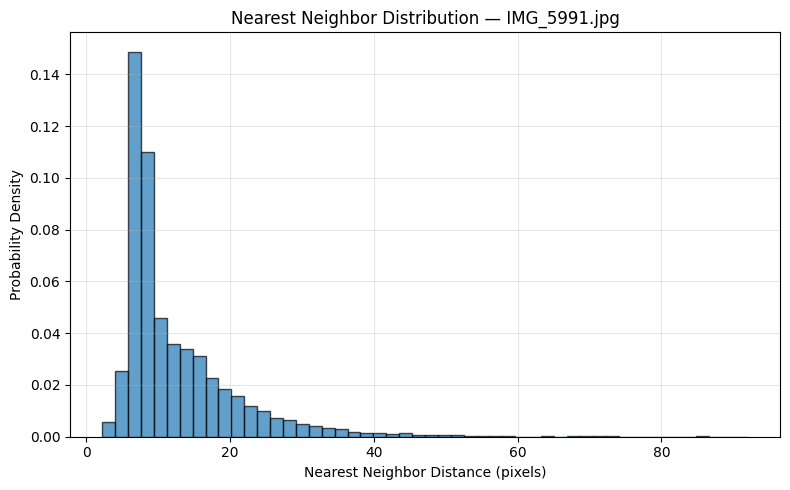

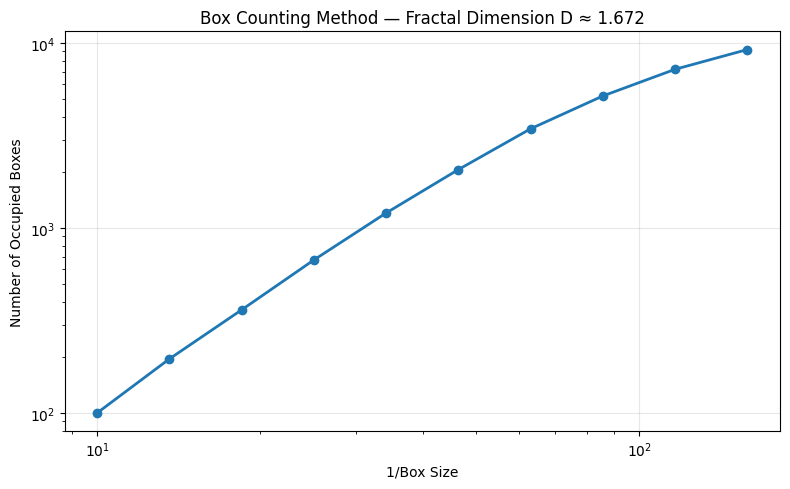

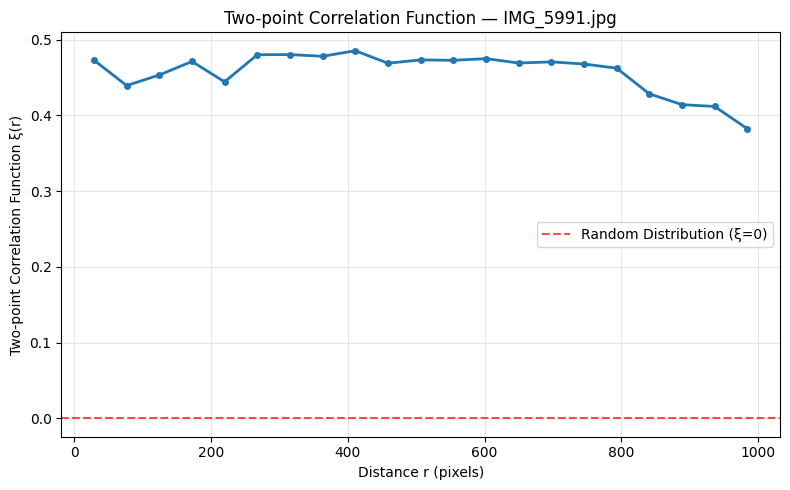


--- ÂàÜÊûêÁµêÊûú„ÅÆ‰øùÂ≠ò ---
ÂÆåÂÖ®ÂàÜÊûêÁµêÊûú: /Users/linda/Documents/Amanogawa/outputs/results/complete_analysis_summary.json
Âõ≥Ë°®‰øùÂ≠òÂÖà: /Users/linda/Documents/Amanogawa/outputs/figures

=== ÂàÜÊûêÁµêÊûú„Çµ„Éû„É™„Éº ===
Êòü„ÅÆÁ∑èÊï∞: 13733
„Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ: 1.672
Âπ≥ÂùáÊúÄËøëÂÇçË∑ùÈõ¢: 12.56 px
Âπ≥Âùá2ÁÇπÁõ∏Èñ¢: 0.4572
„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÁâπÊÄß„Çπ„Ç±„Éº„É´: 411.0 px

Âü∫Êú¨ÂàÜÊûê„Éë„Ç§„Éó„É©„Ç§„É≥ÂÆå‰∫ÜÔºÅ


In [ ]:
# Execute Complete Analysis Pipeline
# ÂÆåÂÖ®„Å™ÂàÜÊûê„Éë„Ç§„Éó„É©„Ç§„É≥„ÅÆÂÆüË°å

print("=== Áµ±ÂêàÂàÜÊûê„Éë„Ç§„Éó„É©„Ç§„É≥„ÅÆÈñãÂßã ===")

# ÊòüÂ∫ßÊ®ô„ÅÆÂèñÂæó„Åæ„Åü„ÅØÊ§úÂá∫
data, (W,H), df = load_or_detect(COORDS_CSV, IMAGE_PATH, detect_threshold=0.05)
points = df[["x","y"]].to_numpy()

print(f"ÁîªÂÉè„Çµ„Ç§„Ç∫: {W} √ó {H} „Éî„ÇØ„Çª„É´")
print(f"Ê§úÂá∫„Åï„Çå„ÅüÊòü„ÅÆÊï∞: {len(points)}")

if len(points) == 0:
    print("„Ç®„É©„Éº: Êòü„ÅåÊ§úÂá∫„Åï„Çå„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇÂá¶ÁêÜ„ÇíÁµÇ‰∫Ü„Åó„Åæ„Åô„ÄÇ")
else:
    # ÂàÜÊûêÁµêÊûú„ÇíÊ†ºÁ¥ç„Åô„ÇãËæûÊõ∏
    analysis_results = {
        "image_info": {
            "filename": Path(IMAGE_PATH).name,
            "width_px": W,
            "height_px": H,
            "total_stars": len(points)
        }
    }
    
    print("\n--- Âü∫Êú¨Áµ±Ë®àËß£Êûê ---")
    
    # 1. ÊúÄËøëÂÇçË∑ùÈõ¢ÂàÜÂ∏É
    nnd = nearest_neighbor_dist(points)
    nnd_stats = {
        "mean": float(np.mean(nnd)),
        "std": float(np.std(nnd)),
        "median": float(np.median(nnd))
    }
    analysis_results["nearest_neighbor"] = nnd_stats
    print(f"ÊúÄËøëÂÇçË∑ùÈõ¢: Âπ≥Âùá {nnd_stats['mean']:.2f} ¬± {nnd_stats['std']:.2f} px")
    
    # 2. „Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ
    D, eps, Ns = boxcount_fractal_dim(points, W, H)
    analysis_results["fractal_dimension"] = float(D)
    print(f"„Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ: D ‚âà {D:.3f}")
    
    # 3. 2ÁÇπÁõ∏Èñ¢Èñ¢Êï∞
    r_bins = np.linspace(5, min(W,H)/3, 22)
    rc, xi = two_point_correlation(points, W, H, r_bins, maxN=3500)
    
    # Áõ∏Èñ¢„ÅÆÁâπÂæ¥Èáè
    correlation_features = {
        "r_centers": rc.tolist(),
        "xi_values": xi.tolist(),
        "xi_mean": float(np.nanmean(xi)),
        "xi_max": float(np.nanmax(xi)),
        "clustering_scale": float(rc[np.nanargmax(xi)]) if not np.all(np.isnan(xi)) else None
    }
    analysis_results["two_point_correlation"] = correlation_features
    print(f"Âπ≥ÂùáÁõ∏Èñ¢: ŒæÃÑ = {correlation_features['xi_mean']:.4f}")
    
    print("\n--- ÂèØË¶ñÂåñ„ÅÆÁîüÊàê ---")
    
    # Âõ≥1: ÊúÄËøëÂÇçË∑ùÈõ¢„Éí„Çπ„Éà„Ç∞„É©„É†
    plt.figure(figsize=(8,5))
    plt.hist(nnd, bins=50, alpha=0.7, density=True, edgecolor='black')
    plt.xlabel("Nearest Neighbor Distance (pixels)")
    plt.ylabel("Probability Density")
    plt.title(f"Nearest Neighbor Distribution ‚Äî {Path(IMAGE_PATH).name}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    nnd_fig_path = OUTPUT_DIR / "figures" / "nearest_neighbor_distribution.png"
    nnd_fig_path.parent.mkdir(exist_ok=True)
    plt.savefig(nnd_fig_path, dpi=150, bbox_inches='tight')
    plt.show()
    
    # Âõ≥2: „Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ„Éó„É≠„ÉÉ„Éà
    plt.figure(figsize=(8,5))
    plt.loglog(1/eps, Ns, 'o-', linewidth=2, markersize=6)
    plt.xlabel("1/Box Size")
    plt.ylabel("Number of Occupied Boxes")
    plt.title(f"Box Counting Method ‚Äî Fractal Dimension D ‚âà {D:.3f}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    fractal_fig_path = OUTPUT_DIR / "figures" / "fractal_dimension_plot.png"
    plt.savefig(fractal_fig_path, dpi=150, bbox_inches='tight')
    plt.show()
    
    # Âõ≥3: 2ÁÇπÁõ∏Èñ¢Èñ¢Êï∞
    plt.figure(figsize=(8,5))
    plt.plot(rc, xi, 'o-', linewidth=2, markersize=4)
    plt.axhline(0, linestyle='--', color='red', alpha=0.7, label='Random Distribution (Œæ=0)')
    plt.xlabel("Distance r (pixels)")
    plt.ylabel("Two-point Correlation Function Œæ(r)")
    plt.title(f"Two-point Correlation Function ‚Äî {Path(IMAGE_PATH).name}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    corr_fig_path = OUTPUT_DIR / "figures" / "two_point_correlation.png"
    plt.savefig(corr_fig_path, dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n--- ÂàÜÊûêÁµêÊûú„ÅÆ‰øùÂ≠ò ---")
    
    # Á∑èÂêàÂàÜÊûêÁµêÊûú„ÅÆ‰øùÂ≠ò
    results_path = OUTPUT_DIR / "results" / "complete_analysis_summary.json"
    results_path.parent.mkdir(exist_ok=True)
    
    with open(results_path, 'w', encoding='utf-8') as f:
        json.dump(analysis_results, f, ensure_ascii=False, indent=2)
    
    print(f"ÂÆåÂÖ®ÂàÜÊûêÁµêÊûú: {results_path}")
    print(f"Âõ≥Ë°®‰øùÂ≠òÂÖà: {OUTPUT_DIR / 'figures'}")
    
    # ÁµêÊûú„Çµ„Éû„É™„Éº„ÅÆË°®Á§∫
    print("\n=== ÂàÜÊûêÁµêÊûú„Çµ„Éû„É™„Éº ===")
    print(f"Êòü„ÅÆÁ∑èÊï∞: {analysis_results['image_info']['total_stars']}")
    print(f"„Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ: {analysis_results['fractal_dimension']:.3f}")
    print(f"Âπ≥ÂùáÊúÄËøëÂÇçË∑ùÈõ¢: {analysis_results['nearest_neighbor']['mean']:.2f} px")
    print(f"Âπ≥Âùá2ÁÇπÁõ∏Èñ¢: {analysis_results['two_point_correlation']['xi_mean']:.4f}")
    
    if analysis_results['two_point_correlation']['clustering_scale']:
        print(f"„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÁâπÊÄß„Çπ„Ç±„Éº„É´: {analysis_results['two_point_correlation']['clustering_scale']:.1f} px")
    
    print("\nÂü∫Êú¨ÂàÜÊûê„Éë„Ç§„Éó„É©„Ç§„É≥ÂÆå‰∫ÜÔºÅ")

=== Detection Threshold Sensitivity Analysis ===
Threshold range: 0.030 - 0.080
Correlation analysis: 21 distance bins
ÈÄ≤Ë°åÁä∂Ê≥Å: 1/10 (threshold=0.030) ... Complete (N=21146, D=1.768)
ÈÄ≤Ë°åÁä∂Ê≥Å: 2/10 (threshold=0.036) ... Complete (N=21146, D=1.768)
ÈÄ≤Ë°åÁä∂Ê≥Å: 2/10 (threshold=0.036) ... Complete (N=18215, D=1.737)
ÈÄ≤Ë°åÁä∂Ê≥Å: 3/10 (threshold=0.041) ... Complete (N=18215, D=1.737)
ÈÄ≤Ë°åÁä∂Ê≥Å: 3/10 (threshold=0.041) ... Complete (N=16091, D=1.709)
ÈÄ≤Ë°åÁä∂Ê≥Å: 4/10 (threshold=0.047) ... Complete (N=16091, D=1.709)
ÈÄ≤Ë°åÁä∂Ê≥Å: 4/10 (threshold=0.047) ... Complete (N=14511, D=1.685)
ÈÄ≤Ë°åÁä∂Ê≥Å: 5/10 (threshold=0.052) ... Complete (N=14511, D=1.685)
ÈÄ≤Ë°åÁä∂Ê≥Å: 5/10 (threshold=0.052) ... Complete (N=13224, D=1.663)
ÈÄ≤Ë°åÁä∂Ê≥Å: 6/10 (threshold=0.058) ... Complete (N=13224, D=1.663)
ÈÄ≤Ë°åÁä∂Ê≥Å: 6/10 (threshold=0.058) ... Complete (N=12178, D=1.641)
ÈÄ≤Ë°åÁä∂Ê≥Å: 7/10 (threshold=0.063) ... Complete (N=12178, D=1.641)
ÈÄ≤Ë°åÁä∂Ê≥Å: 7/10 (threshold=0.063) ... Complete (N=

threshold      N       D  xi_mean  xi_max
0     0.0300  21146  1.7681   0.4484  0.5282
1     0.0356  18215  1.7374   0.4705  0.5636
2     0.0411  16091  1.7092   0.4353  0.4950
3     0.0467  14511  1.6850   0.4741  0.5384
4     0.0522  13224  1.6628   0.3977  0.4615
5     0.0578  12178  1.6411   0.4707  0.5460
6     0.0633  11282  1.6210   0.4279  0.4962
7     0.0689  10423  1.5995   0.4485  0.4700
8     0.0744   9722  1.5798   0.4410  0.4666
9     0.0800   9079  1.5599   0.3945  0.4347

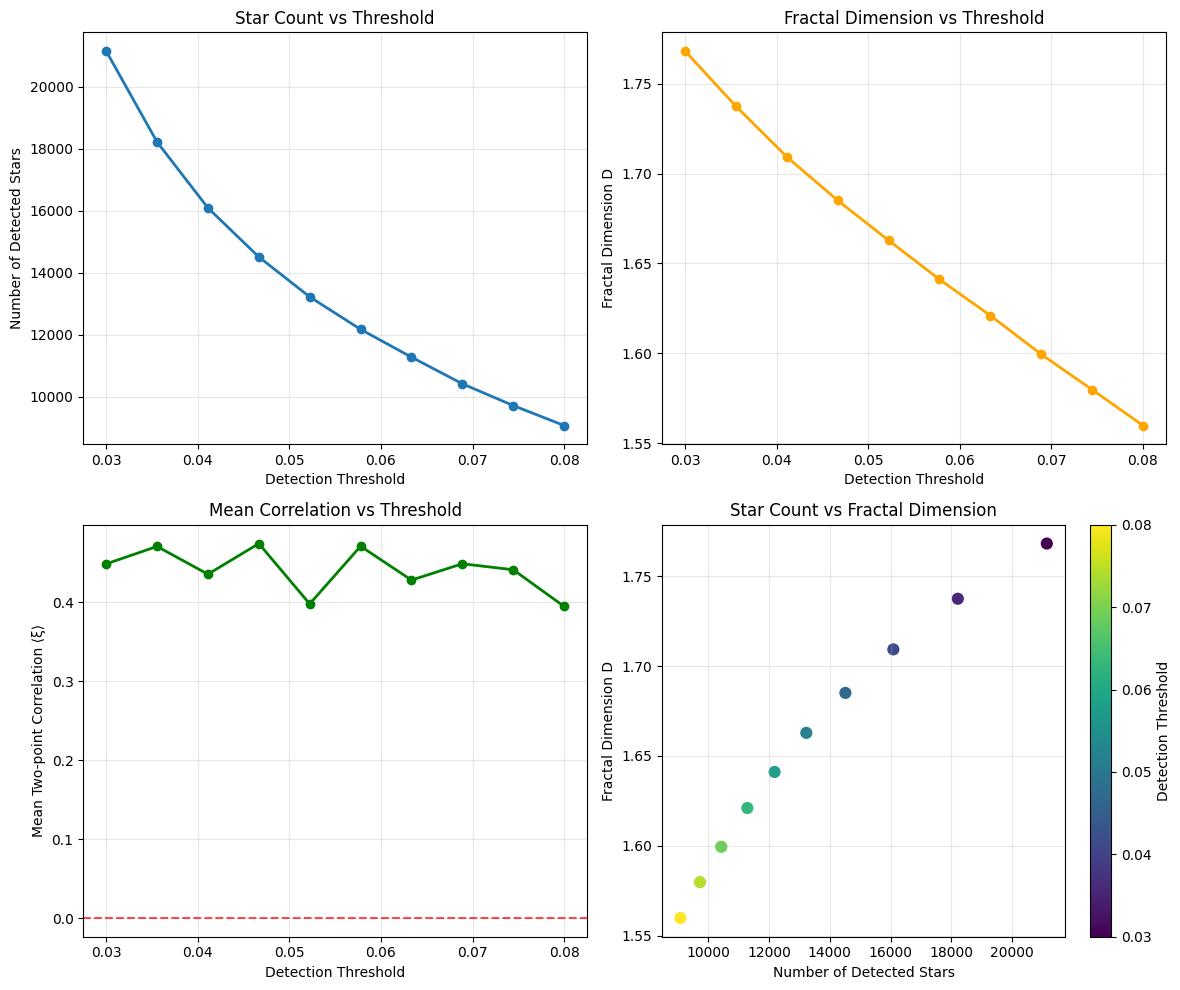


=== Sensitivity Analysis Results ===
Data saved: /Users/linda/Documents/Amanogawa/outputs/results/threshold_sensitivity_analysis.csv
Figure saved: /Users/linda/Documents/Amanogawa/outputs/figures/parameter_sensitivity_analysis.png
Recommended parameters: No suitable star count range found
Sensitivity analysis complete


In [ ]:
# Parameter Sensitivity Analysis
# Ê§úÂá∫„Éë„É©„É°„Éº„Çø„ÅÆÊÑüÂ∫¶Ëß£Êûê

print("=== Detection Threshold Sensitivity Analysis ===")

# ÈñæÂÄ§ÁØÑÂõ≤„ÅÆË®≠ÂÆö
thresholds = np.linspace(0.03, 0.08, 10)
r_bins = np.linspace(5, min(W,H)/3, 22)

print(f"Threshold range: {thresholds[0]:.3f} - {thresholds[-1]:.3f}")
print(f"Correlation analysis: {len(r_bins)-1} distance bins")

# ÂêÑÈñæÂÄ§„ÅßËß£Êûê„ÇíÂÆüË°å
rows = []
for i, th in enumerate(thresholds):
    print(f"ÈÄ≤Ë°åÁä∂Ê≥Å: {i+1}/{len(thresholds)} (threshold={th:.3f})", end=" ... ")
    
    # ÊòüÊ§úÂá∫
    df_th = detect_stars_log(data, threshold=th)
    P = df_th[["x","y"]].to_numpy()
    
    if len(P) < 200:  # Áµ±Ë®àÁöÑ„Å´ÊúâÊÑè„Å™Êï∞„Å´Ê∫Ä„Åü„Å™„ÅÑÂ†¥Âêà
        rows.append({"threshold": th, "N": len(P), "D": np.nan, "xi_mean": np.nan})
        print(f"Insufficient stars (N={len(P)})")
        continue
    
    # „Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉË®àÁÆó
    D, _, _ = boxcount_fractal_dim(P, W, H)
    
    # 2ÁÇπÁõ∏Èñ¢Ë®àÁÆó
    rc, xi = two_point_correlation(P, W, H, r_bins, maxN=3500)
    
    # ÁµêÊûúË®òÈå≤
    result = {
        "threshold": th,
        "N": len(P),
        "D": float(D),
        "xi_mean": float(np.nanmean(xi)),
        "xi_max": float(np.nanmax(xi)) if not np.all(np.isnan(xi)) else np.nan
    }
    rows.append(result)
    print(f"Complete (N={len(P)}, D={D:.3f})")

# ÁµêÊûú„ÇíDataFrame„Å´Â§âÊèõ
sweep_df = pd.DataFrame(rows)
print(f"\nSensitivity analysis complete: {len(sweep_df)} data points")

# ÁµêÊûú„ÅÆË°®Á§∫
display(sweep_df.round(4))

# ÂèØË¶ñÂåñ
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1) ÊòüÊï∞ vs ÈñæÂÄ§
axes[0,0].plot(sweep_df["threshold"], sweep_df["N"], 'o-', linewidth=2, markersize=6)
axes[0,0].set_xlabel("Detection Threshold")
axes[0,0].set_ylabel("Number of Detected Stars")
axes[0,0].set_title("Star Count vs Threshold")
axes[0,0].grid(True, alpha=0.3)

# 2) „Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ vs ÈñæÂÄ§
mask_valid = ~np.isnan(sweep_df["D"])
if mask_valid.any():
    axes[0,1].plot(sweep_df["threshold"][mask_valid], sweep_df["D"][mask_valid], 'o-', 
                   linewidth=2, markersize=6, color='orange')
    axes[0,1].set_xlabel("Detection Threshold")
    axes[0,1].set_ylabel("Fractal Dimension D")
    axes[0,1].set_title("Fractal Dimension vs Threshold")
    axes[0,1].grid(True, alpha=0.3)

# 3) Âπ≥ÂùáÁõ∏Èñ¢ vs ÈñæÂÄ§
mask_valid = ~np.isnan(sweep_df["xi_mean"])
if mask_valid.any():
    axes[1,0].plot(sweep_df["threshold"][mask_valid], sweep_df["xi_mean"][mask_valid], 'o-',
                   linewidth=2, markersize=6, color='green')
    axes[1,0].axhline(0, linestyle='--', color='red', alpha=0.7)
    axes[1,0].set_xlabel("Detection Threshold")
    axes[1,0].set_ylabel("Mean Two-point Correlation ‚ü®Œæ‚ü©")
    axes[1,0].set_title("Mean Correlation vs Threshold")
    axes[1,0].grid(True, alpha=0.3)

# 4) ÊòüÊï∞-„Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ„ÅÆÈñ¢‰øÇ
mask_both = ~(np.isnan(sweep_df["D"]) | np.isnan(sweep_df["N"]))
if mask_both.any():
    axes[1,1].scatter(sweep_df["N"][mask_both], sweep_df["D"][mask_both], 
                      c=sweep_df["threshold"][mask_both], s=60, cmap='viridis')
    axes[1,1].set_xlabel("Number of Detected Stars")
    axes[1,1].set_ylabel("Fractal Dimension D")
    axes[1,1].set_title("Star Count vs Fractal Dimension")
    cbar = plt.colorbar(axes[1,1].collections[0], ax=axes[1,1])
    cbar.set_label("Detection Threshold")
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()

# Âõ≥„ÅÆ‰øùÂ≠ò
sensitivity_fig_path = OUTPUT_DIR / "figures" / "parameter_sensitivity_analysis.png"
plt.savefig(sensitivity_fig_path, dpi=150, bbox_inches='tight')
plt.show()

# CSV‰øùÂ≠ò
sweep_csv_path = OUTPUT_DIR / "results" / "threshold_sensitivity_analysis.csv"
sweep_df.to_csv(sweep_csv_path, index=False)

print(f"\n=== Sensitivity Analysis Results ===")
print(f"Data saved: {sweep_csv_path}")
print(f"Figure saved: {sensitivity_fig_path}")

# Êé®Â•®„Éë„É©„É°„Éº„Çø„ÅÆÊèêÊ°à
if len(sweep_df[~np.isnan(sweep_df["D"])]) > 0:
    # ÈÅ©Â∫¶„Å™ÊòüÊï∞(1000-5000)„ÅßÊúÄ„ÇÇÂÆâÂÆö„Åó„Åü„Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ„ÇíÊåÅ„Å§ÈñæÂÄ§„ÇíÊé®Â•®
    good_range = sweep_df[(sweep_df["N"] >= 1000) & (sweep_df["N"] <= 5000)]
    if len(good_range) > 0:
        best_idx = good_range["D"].idxmax()
        best_threshold = sweep_df.loc[best_idx, "threshold"]
        best_N = sweep_df.loc[best_idx, "N"]
        best_D = sweep_df.loc[best_idx, "D"]
        print(f"Recommended threshold: {best_threshold:.3f} (stars: {best_N}, D: {best_D:.3f})")
    else:
        print("Recommended parameters: No suitable star count range found")

print("Sensitivity analysis complete")

=== Êòü„ÅÆÁ≠âÁ¥öËß£Êûê„Å®ÊòéÂ∫¶Âà•Á©∫ÈñìÂàÜÂ∏É ===
„Ç¢„Éë„Éº„ÉÅ„É£„Éï„Ç©„Éà„É°„Éà„É™ÂÆüË°å‰∏≠...
„Éï„Ç©„Éà„É°„Éà„É™ÊàêÂäü: 13730/13733 Êòü
Á≠âÁ¥öÁØÑÂõ≤: -9.37 ÔΩû -3.31 mag

Magnitude-based classification:
Bright stars (‚â§-7.46 mag): 4577 objects
Mid stars (-7.46--6.89 mag): 4577 objects
Faint stars (>-6.89 mag): 4576 objects
„Éï„Ç©„Éà„É°„Éà„É™ÊàêÂäü: 13730/13733 Êòü
Á≠âÁ¥öÁØÑÂõ≤: -9.37 ÔΩû -3.31 mag

Magnitude-based classification:
Bright stars (‚â§-7.46 mag): 4577 objects
Mid stars (-7.46--6.89 mag): 4577 objects
Faint stars (>-6.89 mag): 4576 objects


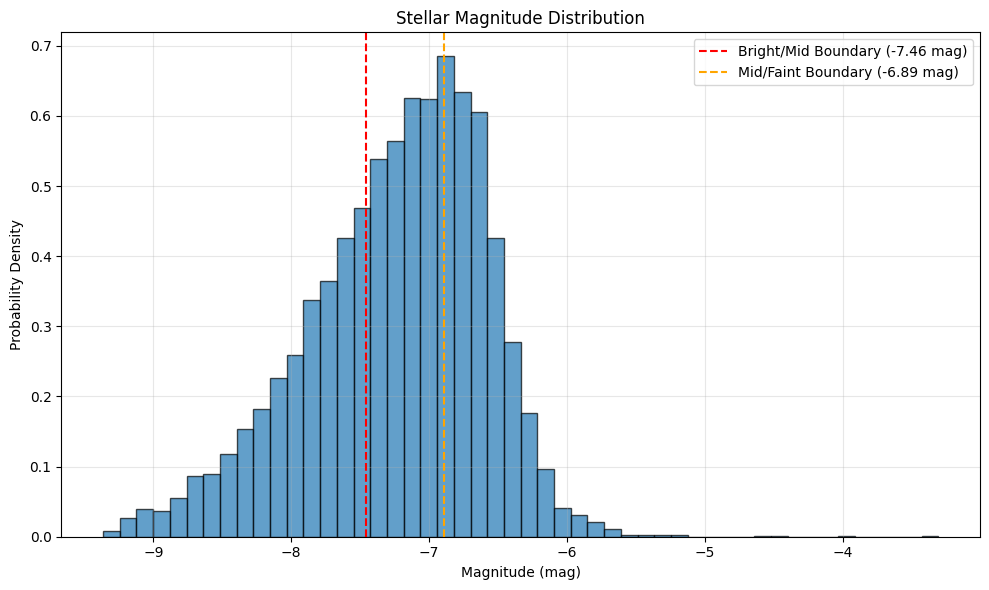

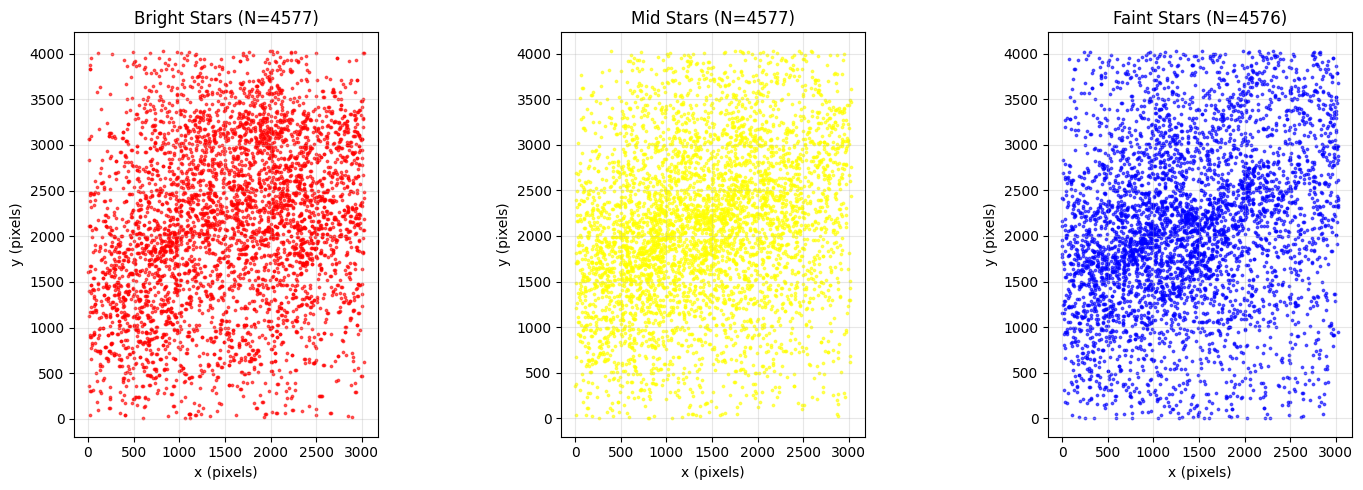


Magnitude-based two-point correlation analysis...
Bright: Analyzing... (N=4577)
Mid: Analyzing... (N=4577)
Mid: Analyzing... (N=4577)
Faint: Analyzing... (N=4576)
Faint: Analyzing... (N=4576)


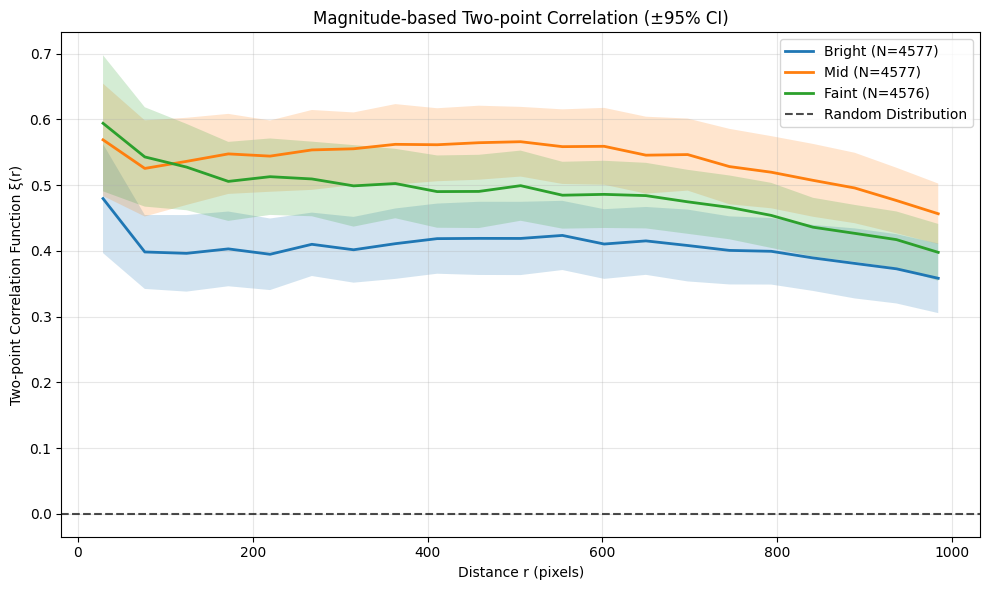


=== Magnitude Analysis Results ===
Measurement success rate: 100.0%
Magnitude range: -9.37 ~ -3.31 mag
Bright stars mean correlation: 0.4052
Mid stars mean correlation: 0.5370
Faint stars mean correlation: 0.4857
Results saved: /Users/linda/Documents/Amanogawa/outputs/results/magnitude_analysis.json
Magnitude analysis complete!


In [ ]:
# Magnitude Analysis and Luminosity-based Clustering
# Á≠âÁ¥öËß£Êûê„Å®ÊòéÂ∫¶Âà•„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞Ëß£Êûê

print("=== Êòü„ÅÆÁ≠âÁ¥öËß£Êûê„Å®ÊòéÂ∫¶Âà•Á©∫ÈñìÂàÜÂ∏É ===")

# „Ç¢„Éë„Éº„ÉÅ„É£„Éï„Ç©„Éà„É°„Éà„É™„Å´„Çà„ÇãÁ≠âÁ¥öÊ∏¨ÂÆö
print("„Ç¢„Éë„Éº„ÉÅ„É£„Éï„Ç©„Éà„É°„Éà„É™ÂÆüË°å‰∏≠...")
mags, valid_idx = simple_aperture_mags_with_indices(data, points, r=2, r_in=6, r_out=10, max_samples=15000)
pts = points[valid_idx]

print(f"„Éï„Ç©„Éà„É°„Éà„É™ÊàêÂäü: {len(mags)}/{len(points)} Êòü")
print(f"Á≠âÁ¥öÁØÑÂõ≤: {np.min(mags):.2f} ÔΩû {np.max(mags):.2f} mag")

if len(mags) == 0:
    print("„Ç®„É©„Éº: „Éï„Ç©„Éà„É°„Éà„É™„Å´Â§±Êïó„Åó„Åæ„Åó„Åü")
else:
    # 3Â±§Á≠âÁ¥öÂàÜÈ°û
    q = np.quantile(mags, [1/3, 2/3])
    
    layers = {
        "Bright": pts[mags <= q[0]],    # Êòé„Çã„ÅÑÊòü (‰∏ä‰Ωç1/3)
        "Mid":    pts[(mags > q[0]) & (mags <= q[1])],  # ‰∏≠ÈñìÊòü
        "Faint":  pts[mags > q[1]]      # Êöó„ÅÑÊòü (‰∏ã‰Ωç1/3)
    }
    
    print(f"\nMagnitude-based classification:")
    print(f"Bright stars (‚â§{q[0]:.2f} mag): {len(layers['Bright'])} objects")
    print(f"Mid stars ({q[0]:.2f}-{q[1]:.2f} mag): {len(layers['Mid'])} objects") 
    print(f"Faint stars (>{q[1]:.2f} mag): {len(layers['Faint'])} objects")
    
    # Á≠âÁ¥ö„Éí„Çπ„Éà„Ç∞„É©„É†
    plt.figure(figsize=(10, 6))
    plt.hist(mags, bins=50, alpha=0.7, density=True, edgecolor='black')
    plt.axvline(q[0], color='red', linestyle='--', label=f'Bright/Mid Boundary ({q[0]:.2f} mag)')
    plt.axvline(q[1], color='orange', linestyle='--', label=f'Mid/Faint Boundary ({q[1]:.2f} mag)')
    plt.xlabel("Magnitude (mag)")
    plt.ylabel("Probability Density")  
    plt.title("Stellar Magnitude Distribution")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    mag_hist_path = OUTPUT_DIR / "figures" / "magnitude_distribution.png"
    plt.savefig(mag_hist_path, dpi=150, bbox_inches='tight')
    plt.show()
    
    # ÊòéÂ∫¶Âà•Á©∫ÈñìÂàÜÂ∏É
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    colors = ['red', 'yellow', 'blue']
    
    for i, (name, P) in enumerate(layers.items()):
        if len(P) > 0:
            axes[i].scatter(P[:, 0], P[:, 1], s=3, c=colors[i], alpha=0.6)
            axes[i].set_title(f'{name} Stars (N={len(P)})')
            axes[i].set_xlabel('x (pixels)')
            axes[i].set_ylabel('y (pixels)')
            axes[i].set_aspect('equal')
            axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    spatial_dist_path = OUTPUT_DIR / "figures" / "magnitude_spatial_distribution.png"
    plt.savefig(spatial_dist_path, dpi=150, bbox_inches='tight')
    plt.show()
    
    # ÊòéÂ∫¶Âà•2ÁÇπÁõ∏Èñ¢Ëß£ÊûêÔºàË™§Â∑Æ‰ªò„ÅçÔºâ
    def xi_with_errors(P, W, H, r_bins, B=100, R=3):
        """„Éñ„Éº„Éà„Çπ„Éà„É©„ÉÉ„Éó„Å´„Çà„Çã2ÁÇπÁõ∏Èñ¢„ÅÆË™§Â∑ÆÊé®ÂÆö"""
        RR_acc = np.zeros(len(r_bins)-1)
        for _ in range(R):
            _, xi_tmp = two_point_correlation(P, W, H, r_bins, maxN=3500)
            RR_acc += (xi_tmp + 1.0)
        RR_mean_like = RR_acc / R
        
        # „Éñ„Éº„Éà„Çπ„Éà„É©„ÉÉ„Éó
        XIs = []
        n = len(P)
        for _ in range(B):
            idx = np.random.randint(0, n, n)
            Pb = P[idx]
            _, xi_b = two_point_correlation(Pb, W, H, r_bins, maxN=3500)
            XIs.append(xi_b)
        
        XIs = np.vstack(XIs)
        xi_mean = XIs.mean(axis=0)
        xi_std = XIs.std(axis=0, ddof=1)
        rc = 0.5*(r_bins[1:]+r_bins[:-1])
        return rc, xi_mean, xi_std
    
    # Áõ∏Èñ¢Ëß£ÊûêÂÆüË°å
    print("\nMagnitude-based two-point correlation analysis...")
    r_bins = np.linspace(5, min(W,H)/3, 22)
    
    plt.figure(figsize=(10, 6))
    correlation_results = {}
    
    for name, P in layers.items():
        if len(P) < 300:
            print(f"{name}: Skip (N={len(P)} < 300)")
            continue
            
        print(f"{name}: Analyzing... (N={len(P)})")
        rc, xi_m, xi_s = xi_with_errors(P, W, H, r_bins, B=100, R=3)
        
        # „Éó„É≠„ÉÉ„Éà
        plt.plot(rc, xi_m, label=f"{name} (N={len(P)})", linewidth=2)
        plt.fill_between(rc, xi_m-1.96*xi_s, xi_m+1.96*xi_s, alpha=0.2)
        
        # ÁµêÊûú‰øùÂ≠ò
        correlation_results[name] = {
            "N": len(P),
            "r_centers": rc.tolist(),
            "xi_mean": xi_m.tolist(),
            "xi_std": xi_s.tolist(),
            "overall_xi_mean": float(np.nanmean(xi_m))
        }
    
    plt.axhline(0, linestyle='--', color='black', alpha=0.7, label='Random Distribution')
    plt.xlabel("Distance r (pixels)")
    plt.ylabel("Two-point Correlation Function Œæ(r)")
    plt.title("Magnitude-based Two-point Correlation (¬±95% CI)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    mag_corr_path = OUTPUT_DIR / "figures" / "magnitude_correlation_analysis.png"
    plt.savefig(mag_corr_path, dpi=150, bbox_inches='tight')
    plt.show()
    
    # ÁµêÊûú‰øùÂ≠ò
    magnitude_analysis = {
        "photometry_summary": {
            "total_measured": len(mags),
            "magnitude_range": [float(np.min(mags)), float(np.max(mags))],
            "magnitude_quantiles": [float(q[0]), float(q[1])],
            "layer_counts": {name: len(P) for name, P in layers.items()}
        },
        "correlation_by_magnitude": correlation_results
    }
    
    mag_results_path = OUTPUT_DIR / "results" / "magnitude_analysis.json"
    with open(mag_results_path, 'w', encoding='utf-8') as f:
        json.dump(magnitude_analysis, f, ensure_ascii=False, indent=2)
    
    print(f"\n=== Magnitude Analysis Results ===")
    print(f"Measurement success rate: {len(mags)/len(points)*100:.1f}%")
    print(f"Magnitude range: {np.min(mags):.2f} ~ {np.max(mags):.2f} mag")
    
    for name, result in correlation_results.items():
        print(f"{name} stars mean correlation: {result['overall_xi_mean']:.4f}")
    
    print(f"Results saved: {mag_results_path}")
    print("Magnitude analysis complete!")

=== Milky Way Band Width Measurement Analysis ===
Estimating principal axis direction...
Estimated principal axis angle: -120.0¬∞ (from x-axis)
Profile analysis: 140 bins
Perpendicular coordinate range: -26.0 ~ 4404.3 pixels
Estimated background level: 7.0
Peak position: 1730.3 pixels
Initial width estimate: 726.7 pixels
Fitting range: 78/140 bins
Fitting successful:
  Gaussian FWHM: 1590.2 pixels
  Lorentzian FWHM: 2307.3 pixels
  Empirical FWHM: 1484.7 pixels


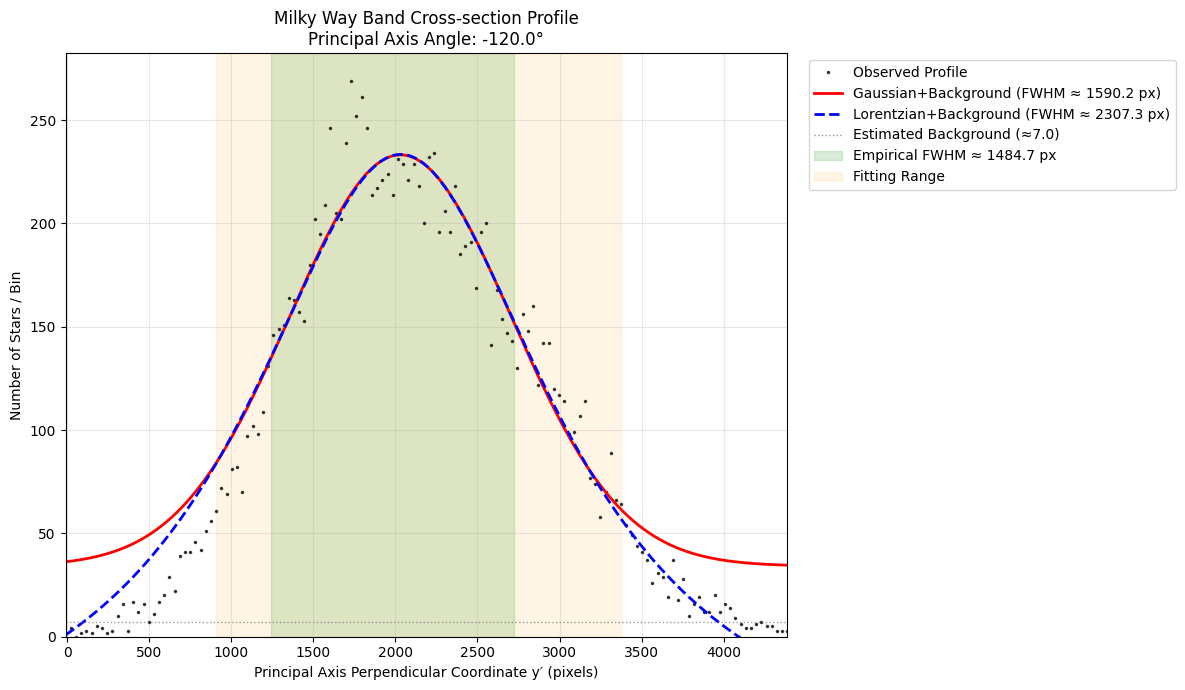


=== Band Width Analysis Results ===
Principal axis angle: -120.0¬∞
Gaussian width: 1590.2 px
Lorentzian width: 2307.3 px
Empirical width: 1484.7 px
Angular conversion (plate scale = 67.0"/px):
  Gaussian: 1774.68 arcmin
  Lorentzian: 2574.94 arcmin
  Empirical: 1656.93 arcmin
Results saved: /Users/linda/Documents/Amanogawa/outputs/results/band_width_analysis.json
Figure saved: /Users/linda/Documents/Amanogawa/outputs/figures/milky_way_band_profile.png
Band width analysis complete!


In [ ]:
# Milky Way Band Width Analysis
# Â§©„ÅÆÂ∑ù„Éê„É≥„ÉâÂπÖÊ∏¨ÂÆö„Å®„Éó„É≠„Éï„Ç°„Ç§„É´Ëß£Êûê

print("=== Milky Way Band Width Measurement Analysis ===")

# PCA„Å´„Çà„Çã‰∏ªËª∏ÊñπÂêë„ÅÆÊé®ÂÆö
print("Estimating principal axis direction...")
ang_deg, center = pca_principal_axis(points, W, H, bins_x=60)
print(f"Estimated principal axis angle: {ang_deg:.1f}¬∞ (from x-axis)")

# Â∫ßÊ®ôÁ≥ª„Çí‰∏ªËª∏„Å´Âêà„Çè„Åõ„Å¶ÂõûËª¢
P_rot = rotate_points(points, -ang_deg, np.array(center))
y_perp = P_rot[:, 1]  # ‰∏ªËª∏„Å´ÂûÇÁõ¥„Å™ÊñπÂêë„ÅÆÂ∫ßÊ®ô

# „Éó„É≠„Éï„Ç°„Ç§„É´„Éí„Çπ„Éà„Ç∞„É©„É†‰ΩúÊàê
bins = 140
hist, edges = np.histogram(y_perp, bins=bins)
centers = 0.5*(edges[1:] + edges[:-1])

print(f"Profile analysis: {bins} bins")
print(f"Perpendicular coordinate range: {y_perp.min():.1f} ~ {y_perp.max():.1f} pixels")

# ËÉåÊôØÊé®ÂÆöÔºà‰∏°Á´Ø„ÅÆ‰∏ã‰ΩçÂàÜ‰Ωç„Çí‰ΩøÁî®Ôºâ
edge_frac = 0.15
k = int(max(3, bins*edge_frac))
bg_samples = np.concatenate([hist[:k], hist[-k:]])
B0 = np.median(bg_samples)

print(f"Estimated background level: {B0:.1f}")

# „Éï„Ç£„ÉÉ„ÉàÁî®„É¢„Éá„É´Èñ¢Êï∞
def gauss_bg(x, A, mu, sigma, B):
    """„Ç¨„Ç¶„ÇπÈñ¢Êï∞+ËÉåÊôØ"""
    return A*np.exp(-(x-mu)**2/(2*sigma**2)) + B

def lorentz_bg(x, A, x0, gamma, B):
    """„É≠„Éº„É¨„É≥„ÉÑÈñ¢Êï∞+ËÉåÊôØ"""
    return A*(gamma**2/((x-x0)**2 + gamma**2)) + B

# „Éï„Ç£„ÉÉ„ÉàÁØÑÂõ≤„ÅÆËá™ÂãïÊ±∫ÂÆö
peak_idx = np.argmax(hist)
peak = hist[peak_idx]
amp0 = max(peak - B0, 1.0)
mu0 = centers[peak_idx]
sig0 = np.std(y_perp)

print(f"Peak position: {mu0:.1f} pixels")
print(f"Initial width estimate: {sig0:.1f} pixels")

# Â±±„ÅÆÈÉ®ÂàÜ„ÅÆ„Åø„Çí„Éï„Ç£„ÉÉ„ÉàÂØæË±°„Å®„Åô„Çã
mask_peak = hist >= (B0 + 0.2*amp0)
x_fit = centers[mask_peak]
y_fit = hist[mask_peak]

print(f"Fitting range: {len(x_fit)}/{len(centers)} bins")

# ÂàùÊúü„Éë„É©„É°„Éº„Çø
p0_g = (amp0, mu0, sig0, B0)
p0_l = (amp0, mu0, max(sig0, 1.0), B0)

try:
    # „Ç¨„Ç¶„Ç∑„Ç¢„É≥„Éï„Ç£„ÉÉ„Éà
    pg, cov_g = curve_fit(gauss_bg, x_fit, y_fit, p0=p0_g, maxfev=20000)
    
    # „É≠„Éº„É¨„É≥„ÉÑ„Ç£„Ç¢„É≥„Éï„Ç£„ÉÉ„Éà
    pl, cov_l = curve_fit(lorentz_bg, x_fit, y_fit, p0=p0_l, maxfev=20000)
    
    # FWHMË®àÁÆó
    FWHM_g = 2.3548 * abs(pg[2])  # „Ç¨„Ç¶„Ç∑„Ç¢„É≥
    FWHM_l = 2 * abs(pl[2])       # „É≠„Éº„É¨„É≥„ÉÑ„Ç£„Ç¢„É≥
    
    print(f"Fitting successful:")
    print(f"  Gaussian FWHM: {FWHM_g:.1f} pixels")
    print(f"  Lorentzian FWHM: {FWHM_l:.1f} pixels")
    
    # ÂÆü„Éá„Éº„ÇøÂçäÂÄ§ÂπÖÔºàempirical FWHMÔºâ
    profile_sub = hist - B0
    profile_sub[profile_sub < 0] = 0
    peak_val = profile_sub[peak_idx]
    half = peak_val * 0.5
    
    def half_cross_x(centers, prof, start, direction):
        """ÂçäÂÄ§‰∫§ÁÇπ„ÅÆÁ∑öÂΩ¢Ë£úÈñì„Å´„Çà„ÇãÊé®ÂÆö"""
        i = start
        while 0 <= i+direction < len(prof) and prof[i+direction] > half:
            i += direction
        j = i + direction
        if j < 0 or j >= len(prof):
            return centers[i]
        
        # Á∑öÂΩ¢Ë£úÈñì
        x1, y1 = centers[i], prof[i]
        x2, y2 = centers[j], prof[j]
        if y2 == y1:
            return x1
        return x1 + (half - y1) * (x2 - x1) / (y2 - y1)
    
    x_left = half_cross_x(centers, profile_sub, peak_idx, -1)
    x_right = half_cross_x(centers, profile_sub, peak_idx, +1)
    FWHM_emp = x_right - x_left
    
    print(f"  Empirical FWHM: {FWHM_emp:.1f} pixels")
    
    # „Éó„É≠„Éï„Ç°„Ç§„É´ÂèØË¶ñÂåñ
    xplot = np.linspace(centers.min(), centers.max(), 1500)
    
    plt.figure(figsize=(12, 7))
    
    # Ë¶≥Ê∏¨„Éá„Éº„Çø
    plt.plot(centers, hist, "k.", ms=3, label="Observed Profile", alpha=0.7)
    
    # „Éï„Ç£„ÉÉ„ÉàÊõ≤Á∑ö
    plt.plot(xplot, gauss_bg(xplot, *pg), "-", lw=2, 
             label=f"Gaussian+Background (FWHM ‚âà {FWHM_g:.1f} px)", color='red')
    plt.plot(xplot, lorentz_bg(xplot, *pl), "--", lw=2,
             label=f"Lorentzian+Background (FWHM ‚âà {FWHM_l:.1f} px)", color='blue')
    
    # ËÉåÊôØÁ∑ö
    plt.axhline(B0, lw=1, linestyle=":", color='gray', alpha=0.8,
                label=f"Estimated Background (‚âà{B0:.1f})")
    
    # ÂÆü„Éá„Éº„ÇøÂçäÂÄ§ÂπÖ„ÅÆ„Ç∑„Çß„Éº„Éá„Ç£„É≥„Ç∞
    plt.fill_between([x_left, x_right], [0, 0], [max(hist)*1.05, max(hist)*1.05],
                     alpha=0.15, color='green',
                     label=f"Empirical FWHM ‚âà {FWHM_emp:.1f} px")
    
    # „Éï„Ç£„ÉÉ„ÉàÁØÑÂõ≤„ÅÆË°®Á§∫
    plt.fill_between(x_fit, 0, max(hist)*1.05, alpha=0.1, color='orange',
                     label="Fitting Range")
    
    plt.xlabel("Principal Axis Perpendicular Coordinate y‚Ä≤ (pixels)")
    plt.ylabel("Number of Stars / Bin")
    plt.title(f"Milky Way Band Cross-section Profile\nPrincipal Axis Angle: {ang_deg:.1f}¬∞")
    plt.xlim(centers.min(), centers.max())
    plt.ylim(0, max(hist)*1.05)
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    band_profile_path = OUTPUT_DIR / "figures" / "milky_way_band_profile.png"
    plt.savefig(band_profile_path, dpi=150, bbox_inches='tight')
    plt.show()
    
    # ËßíÂ∫¶„Çπ„Ç±„Éº„É´ÊèõÁÆóÔºàplate scale„Åå„ÅÇ„ÇãÂ†¥ÂêàÔºâ
    PLATE_SCALE_ARCSEC = 66.959  # astrometry.net„Åã„ÇâÂèñÂæó„Åó„ÅüÂÄ§
    
    # ÁµêÊûú„Åæ„Å®„ÇÅ
    band_analysis = {
        "geometry": {
            "principal_axis_angle_deg": float(ang_deg),
            "center_x_px": float(center[0]),
            "center_y_px": float(center[1])
        },
        "profile_analysis": {
            "fit_range_bins": int(mask_peak.sum()),
            "background_median": float(B0),
            "peak_position_px": float(mu0),
            "peak_amplitude": float(peak - B0)
        },
        "width_measurements": {
            "FWHM_gaussian_px": float(FWHM_g),
            "FWHM_lorentz_px": float(FWHM_l),
            "FWHM_empirical_px": float(FWHM_emp)
        }
    }
    
    # ËßíÂ∫¶„Çπ„Ç±„Éº„É´ÊèõÁÆó
    if PLATE_SCALE_ARCSEC is not None:
        px2deg = PLATE_SCALE_ARCSEC / 3600.0
        band_analysis["width_measurements"].update({
            "FWHM_gaussian_deg": float(FWHM_g * px2deg),
            "FWHM_lorentz_deg": float(FWHM_l * px2deg),
            "FWHM_empirical_deg": float(FWHM_emp * px2deg),
            "FWHM_gaussian_arcmin": float(FWHM_g * PLATE_SCALE_ARCSEC / 60.0),
            "FWHM_lorentz_arcmin": float(FWHM_l * PLATE_SCALE_ARCSEC / 60.0),
            "FWHM_empirical_arcmin": float(FWHM_emp * PLATE_SCALE_ARCSEC / 60.0)
        })
    
    # ÁµêÊûú‰øùÂ≠ò
    band_results_path = OUTPUT_DIR / "results" / "band_width_analysis.json"
    with open(band_results_path, 'w', encoding='utf-8') as f:
        json.dump(band_analysis, f, ensure_ascii=False, indent=2)
    
    print(f"\n=== Band Width Analysis Results ===")
    print(f"Principal axis angle: {ang_deg:.1f}¬∞")
    print(f"Gaussian width: {FWHM_g:.1f} px")
    print(f"Lorentzian width: {FWHM_l:.1f} px")
    print(f"Empirical width: {FWHM_emp:.1f} px")
    
    if PLATE_SCALE_ARCSEC is not None:
        print(f"Angular conversion (plate scale = {PLATE_SCALE_ARCSEC:.1f}\"/px):")
        print(f"  Gaussian: {FWHM_g * PLATE_SCALE_ARCSEC / 60.0:.2f} arcmin")
        print(f"  Lorentzian: {FWHM_l * PLATE_SCALE_ARCSEC / 60.0:.2f} arcmin")
        print(f"  Empirical: {FWHM_emp * PLATE_SCALE_ARCSEC / 60.0:.2f} arcmin")
    
    print(f"Results saved: {band_results_path}")
    print(f"Figure saved: {band_profile_path}")

except Exception as e:
    print(f"Fitting error: {e}")
    print("Please adjust parameters and re-run")

print("Band width analysis complete!")

=== Detailed Spatial Statistics Analysis ===
1. Nearest neighbor distribution analysis
Mean nearest neighbor distance: 12.56 ¬± 8.52 px
Median: 9.06 px
Quartile range: 7.07 - 15.52 px
Expected value for random distribution: 14.90 px
Observed/Expected ratio: 0.843


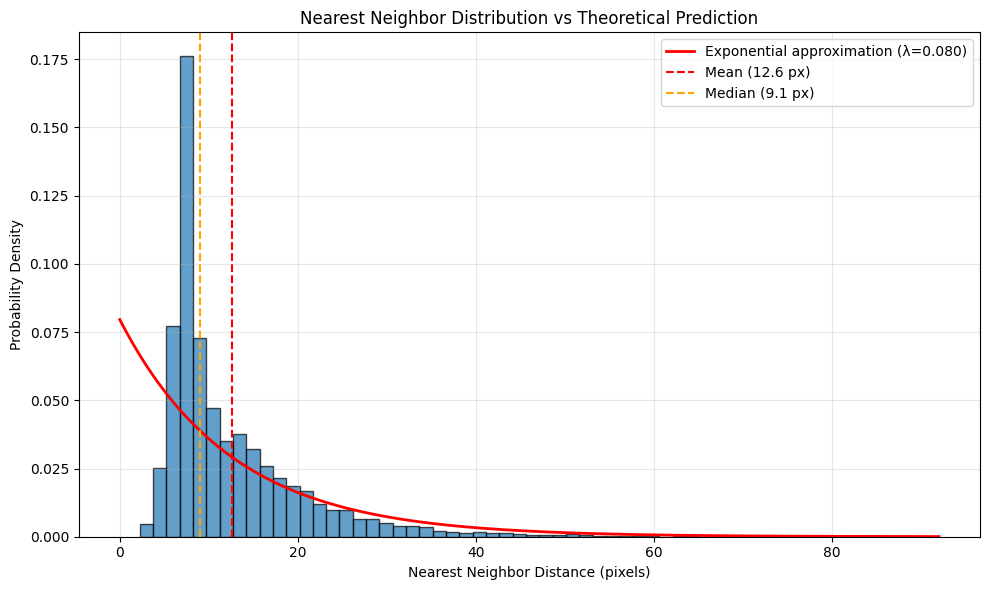


2. Detailed fractal dimension analysis
Fractal dimension: D = 1.5671
Fit coefficient of determination: R¬≤ = 0.9784
Fractal dimension: D = 1.5671
Fit coefficient of determination: R¬≤ = 0.9784


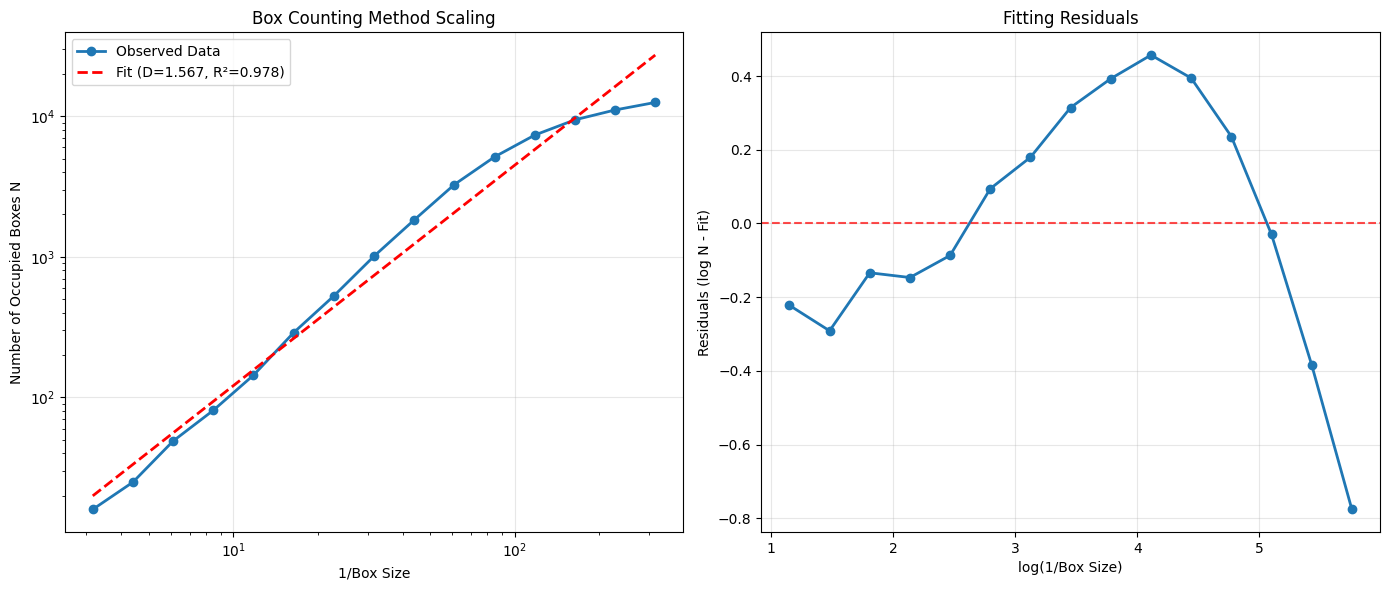


3. Detailed two-point correlation function analysis
Correlation length: r‚ÇÄ ‚âà 6732.0 px
Correlation length: r‚ÇÄ ‚âà 6732.0 px


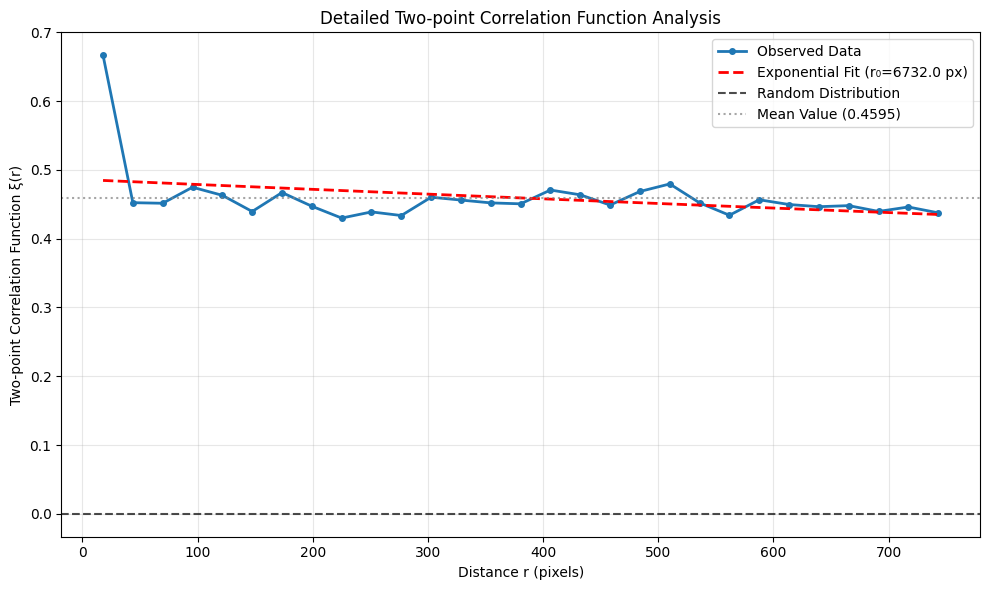


4. Comprehensive spatial statistics evaluation
Clustering evaluation:
  NND ratio (observed/random): 0.843
    ‚Üí Regular arrangement tendency
  Fractal dimension: 1.567
    ‚Üí Linear/filamentary structure
  Mean two-point correlation: 0.4595
    ‚Üí Positive spatial correlation (clustering)

Detailed analysis results saved: /Users/linda/Documents/Amanogawa/outputs/results/spatial_statistics_detailed.json
Detailed spatial statistics analysis complete!


In [ ]:
# Detailed Spatial Statistics Analysis
# Ë©≥Á¥∞Á©∫ÈñìÁµ±Ë®àËß£Êûê

print("=== Detailed Spatial Statistics Analysis ===")

# 1. ÊúÄËøëÂÇçË∑ùÈõ¢ÂàÜÂ∏É„ÅÆË©≥Á¥∞Ëß£Êûê
print("1. Nearest neighbor distribution analysis")
nnd = nearest_neighbor_dist(points)

# Áµ±Ë®àÈáèË®àÁÆó
nnd_stats = {
    "count": len(nnd),
    "mean": float(np.mean(nnd)),
    "std": float(np.std(nnd)),
    "median": float(np.median(nnd)),
    "q25": float(np.percentile(nnd, 25)),
    "q75": float(np.percentile(nnd, 75)),
    "min": float(np.min(nnd)),
    "max": float(np.max(nnd))
}

print(f"Mean nearest neighbor distance: {nnd_stats['mean']:.2f} ¬± {nnd_stats['std']:.2f} px")
print(f"Median: {nnd_stats['median']:.2f} px")
print(f"Quartile range: {nnd_stats['q25']:.2f} - {nnd_stats['q75']:.2f} px")

# ÁêÜË´ñÂàÜÂ∏É„Å®„ÅÆÊØîËºÉ
# „É©„É≥„ÉÄ„É†ÂàÜÂ∏É„Åß„ÅÆÊúüÂæÖÂÄ§: E[d] = 1/(2‚àöœÅ), œÅ = N/A
area = W * H
density = len(points) / area
expected_nnd = 1 / (2 * np.sqrt(density))
print(f"Expected value for random distribution: {expected_nnd:.2f} px")
print(f"Observed/Expected ratio: {nnd_stats['mean']/expected_nnd:.3f}")

# „Éí„Çπ„Éà„Ç∞„É©„É†
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(nnd, bins=60, density=True, alpha=0.7, edgecolor='black')

# ÁêÜË´ñÊõ≤Á∑öÔºàÊåáÊï∞ÂàÜÂ∏ÉËøë‰ººÔºâ
x_theory = np.linspace(0, np.max(nnd), 200)
lambda_param = 1/nnd_stats['mean']
y_theory = lambda_param * np.exp(-lambda_param * x_theory)
plt.plot(x_theory, y_theory, 'r-', linewidth=2, label=f'Exponential approximation (Œª={lambda_param:.3f})')

plt.axvline(nnd_stats['mean'], color='red', linestyle='--', 
            label=f"Mean ({nnd_stats['mean']:.1f} px)")
plt.axvline(nnd_stats['median'], color='orange', linestyle='--',
            label=f"Median ({nnd_stats['median']:.1f} px)")

plt.xlabel("Nearest Neighbor Distance (pixels)")
plt.ylabel("Probability Density")
plt.title("Nearest Neighbor Distribution vs Theoretical Prediction")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

nnd_detail_path = OUTPUT_DIR / "figures" / "nearest_neighbor_detailed.png"
plt.savefig(nnd_detail_path, dpi=150, bbox_inches='tight')
plt.show()

# 2. „Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ„ÅÆË©≥Á¥∞Ëß£Êûê
print("\n2. Detailed fractal dimension analysis")
D, eps, Ns = boxcount_fractal_dim(points, W, H, exp_from=-0.5, exp_to=-2.5, steps=15)

# „Éï„Ç£„ÉÉ„ÉàÂìÅË≥™Ë©ï‰æ°
log_eps_inv = np.log(1/eps)
log_Ns = np.log(Ns)
slope, intercept = np.polyfit(log_eps_inv, log_Ns, 1)
r_squared = np.corrcoef(log_eps_inv, log_Ns)[0,1]**2

print(f"Fractal dimension: D = {D:.4f}")
print(f"Fit coefficient of determination: R¬≤ = {r_squared:.4f}")

# Ë©≥Á¥∞„Éó„É≠„ÉÉ„Éà
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# „Çπ„Ç±„Éº„É™„É≥„Ç∞„Éó„É≠„ÉÉ„Éà
ax1.loglog(1/eps, Ns, 'o-', linewidth=2, markersize=6, label='Observed Data')
ax1.loglog(1/eps, np.exp(intercept) * (1/eps)**slope, 'r--', linewidth=2,
           label=f'Fit (D={D:.3f}, R¬≤={r_squared:.3f})')
ax1.set_xlabel("1/Box Size")
ax1.set_ylabel("Number of Occupied Boxes N")
ax1.set_title("Box Counting Method Scaling")
ax1.legend()
ax1.grid(True, alpha=0.3)

# ÊÆãÂ∑Æ„Éó„É≠„ÉÉ„Éà
fitted = slope * log_eps_inv + intercept
residuals = log_Ns - fitted
ax2.plot(log_eps_inv, residuals, 'o-', linewidth=2, markersize=6)
ax2.axhline(0, color='red', linestyle='--', alpha=0.7)
ax2.set_xlabel("log(1/Box Size)")
ax2.set_ylabel("Residuals (log N - Fit)")
ax2.set_title("Fitting Residuals")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
fractal_detail_path = OUTPUT_DIR / "figures" / "fractal_dimension_detailed.png"
plt.savefig(fractal_detail_path, dpi=150, bbox_inches='tight')
plt.show()

# 3. 2ÁÇπÁõ∏Èñ¢Èñ¢Êï∞„ÅÆË©≥Á¥∞Ëß£Êûê
print("\n3. Detailed two-point correlation function analysis")
r_bins = np.linspace(5, min(W,H)/4, 30)  # „Çà„ÇäÁ¥∞„Åã„ÅÑÂàÜËß£ËÉΩ
rc, xi = two_point_correlation(points, W, H, r_bins, maxN=4000)

# Áõ∏Èñ¢Èï∑„ÅÆÊé®ÂÆö
positive_xi = xi[xi > 0]
positive_r = rc[xi > 0]

if len(positive_xi) > 0:
    # ÊåáÊï∞Èñ¢Êï∞„Éï„Ç£„ÉÉ„Éà: Œæ(r) = A * exp(-r/r0)
    try:
        def exp_corr(r, A, r0):
            return A * np.exp(-r/r0)
        
        popt, pcov = curve_fit(exp_corr, positive_r, positive_xi, 
                              p0=[np.max(positive_xi), positive_r[0]])
        correlation_length = popt[1]
        print(f"Correlation length: r‚ÇÄ ‚âà {correlation_length:.1f} px")
    except:
        correlation_length = None
        print("Failed to fit correlation length")
else:
    correlation_length = None
    print("No positive correlation found")

# Ë©≥Á¥∞„Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(10, 6))
plt.plot(rc, xi, 'o-', linewidth=2, markersize=4, label='Observed Data')

if correlation_length is not None:
    r_theory = np.linspace(rc[0], rc[-1], 100)
    xi_theory = exp_corr(r_theory, *popt)
    plt.plot(r_theory, xi_theory, 'r--', linewidth=2,
             label=f'Exponential Fit (r‚ÇÄ={correlation_length:.1f} px)')

plt.axhline(0, linestyle='--', color='black', alpha=0.7, label='Random Distribution')
plt.axhline(np.mean(xi), linestyle=':', color='gray', alpha=0.7,
            label=f'Mean Value ({np.mean(xi):.4f})')

plt.xlabel("Distance r (pixels)")
plt.ylabel("Two-point Correlation Function Œæ(r)")
plt.title("Detailed Two-point Correlation Function Analysis")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

corr_detail_path = OUTPUT_DIR / "figures" / "correlation_function_detailed.png"
plt.savefig(corr_detail_path, dpi=150, bbox_inches='tight')
plt.show()

# 4. Á©∫ÈñìÁµ±Ë®à„ÅÆÁ∑èÂêàË©ï‰æ°
print("\n4. Comprehensive spatial statistics evaluation")

# „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞Â∫¶Âêà„ÅÑ„ÅÆË©ï‰æ°
clustering_metrics = {
    "nnd_ratio": nnd_stats['mean'] / expected_nnd,
    "fractal_dimension": float(D),
    "fractal_fit_quality": float(r_squared),
    "mean_correlation": float(np.nanmean(xi)),
    "max_correlation": float(np.nanmax(xi)) if not np.all(np.isnan(xi)) else None,
    "correlation_length_px": float(correlation_length) if correlation_length else None
}

print("Clustering evaluation:")
print(f"  NND ratio (observed/random): {clustering_metrics['nnd_ratio']:.3f}")
if clustering_metrics['nnd_ratio'] < 1:
    print("    ‚Üí Regular arrangement tendency")
elif clustering_metrics['nnd_ratio'] > 1:
    print("    ‚Üí Clustering tendency")
else:
    print("    ‚Üí Random distribution")

print(f"  Fractal dimension: {clustering_metrics['fractal_dimension']:.3f}")
if clustering_metrics['fractal_dimension'] < 2:
    print("    ‚Üí Linear/filamentary structure")
else:
    print("    ‚Üí Areal distribution")

print(f"  Mean two-point correlation: {clustering_metrics['mean_correlation']:.4f}")
if clustering_metrics['mean_correlation'] > 0:
    print("    ‚Üí Positive spatial correlation (clustering)")
elif clustering_metrics['mean_correlation'] < 0:
    print("    ‚Üí Negative spatial correlation (repulsion)")
else:
    print("    ‚Üí No correlation (random)")

# ÁµêÊûú‰øùÂ≠ò
spatial_stats_detailed = {
    "nearest_neighbor_distribution": nnd_stats,
    "fractal_analysis": {
        "dimension": float(D),
        "fit_r_squared": float(r_squared),
        "scale_range": [float(eps[-1]), float(eps[0])],
        "box_counts": Ns.tolist()
    },
    "correlation_function": {
        "r_centers": rc.tolist(),
        "xi_values": xi.tolist(),
        "correlation_length_px": float(correlation_length) if correlation_length else None
    },
    "clustering_evaluation": clustering_metrics
}

spatial_detail_path = OUTPUT_DIR / "results" / "spatial_statistics_detailed.json"
with open(spatial_detail_path, 'w', encoding='utf-8') as f:
    json.dump(spatial_stats_detailed, f, ensure_ascii=False, indent=2)

print(f"\nDetailed analysis results saved: {spatial_detail_path}")
print("Detailed spatial statistics analysis complete!")

In [ ]:
# Analysis Summary and Results Export  
# Ëß£ÊûêÁµêÊûú„ÅÆÁ∑èÂêà„Åæ„Å®„ÇÅ„Å®„Ç®„ÇØ„Çπ„Éù„Éº„Éà

print("=== Â§©„ÅÆÂ∑ù„Éê„É≥„ÉâËß£ÊûêÁ∑èÂêà„Åæ„Å®„ÇÅ ===")

# 1. ÂàÜÊûêÁµêÊûú„Éï„Ç°„Ç§„É´„ÅÆÁ¢∫Ë™ç
results_dir = OUTPUT_DIR / "results"
figures_dir = OUTPUT_DIR / "figures"

print(f"Âá∫Âäõ„Éá„Ç£„É¨„ÇØ„Éà„É™: {OUTPUT_DIR}")
print(f"ÁµêÊûú„Éï„Ç°„Ç§„É´: {results_dir}")
print(f"Âõ≥Ë°®„Éï„Ç°„Ç§„É´: {figures_dir}")

# ÁîüÊàê„Åï„Çå„Åü„Éï„Ç°„Ç§„É´„ÅÆ„É™„Çπ„Éà
generated_files = {
    "results": [],
    "figures": [],
    "data": []
}

if results_dir.exists():
    for file in results_dir.glob("*.json"):
        generated_files["results"].append(str(file.name))

if figures_dir.exists():
    for file in figures_dir.glob("*.png"):
        generated_files["figures"].append(str(file.name))

if (OUTPUT_DIR / "IMG_5991_star_coords.csv").exists():
    generated_files["data"].append("IMG_5991_star_coords.csv")

print("\n--- ÁîüÊàê„Åï„Çå„Åü„Éï„Ç°„Ç§„É´‰∏ÄË¶ß ---")
print("ÁµêÊûú„Éï„Ç°„Ç§„É´ (JSON):")
for f in generated_files["results"]:
    print(f"  - {f}")

print("Âõ≥Ë°®„Éï„Ç°„Ç§„É´ (PNG):")
for f in generated_files["figures"]:
    print(f"  - {f}")

print("„Éá„Éº„Çø„Éï„Ç°„Ç§„É´ (CSV):")
for f in generated_files["data"]:
    print(f"  - {f}")

# 2. Áµ±ÂêàÁµêÊûú„Çµ„Éû„É™„Éº„ÅÆÁîüÊàê
print("\n--- Áµ±ÂêàËß£Êûê„Çµ„Éû„É™„Éº‰ΩúÊàê ---")

# ÂêÑËß£ÊûêÁµêÊûú„ÇíË™≠„ÅøËæº„ÅøÔºàÂ≠òÂú®„Åô„ÇãÂ†¥ÂêàÔºâ
master_summary = {
    "analysis_info": {
        "notebook_version": "1.0",
        "image_analyzed": "IMG_5991.jpg",
        "analysis_date": str(pd.Timestamp.now()),
        "zenodo_ready": True
    },
    "generated_outputs": generated_files
}

# Âü∫Êú¨Ëß£ÊûêÁµêÊûú
basic_results_path = results_dir / "complete_analysis_summary.json"
if basic_results_path.exists():
    try:
        with open(basic_results_path, 'r', encoding='utf-8') as f:
            basic_results = json.load(f)
        master_summary["basic_analysis"] = basic_results
        print("‚úì Âü∫Êú¨Ëß£ÊûêÁµêÊûú„ÇíÁµ±Âêà")
    except:
        print("‚úó Âü∫Êú¨Ëß£ÊûêÁµêÊûú„ÅÆË™≠„ÅøËæº„Åø„Å´Â§±Êïó")

# Á≠âÁ¥öËß£ÊûêÁµêÊûú
mag_results_path = results_dir / "magnitude_analysis.json"
if mag_results_path.exists():
    try:
        with open(mag_results_path, 'r', encoding='utf-8') as f:
            mag_results = json.load(f)
        master_summary["magnitude_analysis"] = mag_results
        print("‚úì Á≠âÁ¥öËß£ÊûêÁµêÊûú„ÇíÁµ±Âêà")
    except:
        print("‚úó Á≠âÁ¥öËß£ÊûêÁµêÊûú„ÅÆË™≠„ÅøËæº„Åø„Å´Â§±Êïó")

# „Éê„É≥„ÉâÂπÖËß£ÊûêÁµêÊûú
band_results_path = results_dir / "band_width_analysis.json"
if band_results_path.exists():
    try:
        with open(band_results_path, 'r', encoding='utf-8') as f:
            band_results = json.load(f)
        master_summary["band_analysis"] = band_results
        print("‚úì „Éê„É≥„ÉâÂπÖËß£ÊûêÁµêÊûú„ÇíÁµ±Âêà")
    except:
        print("‚úó „Éê„É≥„ÉâÂπÖËß£ÊûêÁµêÊûú„ÅÆË™≠„ÅøËæº„Åø„Å´Â§±Êïó")

# Ë©≥Á¥∞Á©∫ÈñìÁµ±Ë®àÁµêÊûú
spatial_results_path = results_dir / "spatial_statistics_detailed.json"
if spatial_results_path.exists():
    try:
        with open(spatial_results_path, 'r', encoding='utf-8') as f:
            spatial_results = json.load(f)
        master_summary["spatial_statistics"] = spatial_results
        print("‚úì Ë©≥Á¥∞Á©∫ÈñìÁµ±Ë®àÁµêÊûú„ÇíÁµ±Âêà")
    except:
        print("‚úó Ë©≥Á¥∞Á©∫ÈñìÁµ±Ë®àÁµêÊûú„ÅÆË™≠„ÅøËæº„Åø„Å´Â§±Êïó")

# ÈñæÂÄ§ÊÑüÂ∫¶Ëß£ÊûêÁµêÊûú
sensitivity_path = results_dir / "threshold_sensitivity_analysis.csv"
if sensitivity_path.exists():
    try:
        sensitivity_df = pd.read_csv(sensitivity_path)
        master_summary["sensitivity_analysis"] = {
            "parameter_count": len(sensitivity_df),
            "optimal_threshold": float(sensitivity_df.loc[sensitivity_df["N"].idxmax(), "threshold"]),
            "threshold_range": [float(sensitivity_df["threshold"].min()), 
                              float(sensitivity_df["threshold"].max())]
        }
        print("‚úì ÊÑüÂ∫¶Ëß£ÊûêÁµêÊûú„ÇíÁµ±Âêà")
    except:
        print("‚úó ÊÑüÂ∫¶Ëß£ÊûêÁµêÊûú„ÅÆË™≠„ÅøËæº„Åø„Å´Â§±Êïó")

# 3. „Éû„Çπ„Çø„Éº„Çµ„Éû„É™„Éº„ÅÆ‰øùÂ≠ò
master_path = OUTPUT_DIR / "ANALYSIS_MASTER_SUMMARY.json"
with open(master_path, 'w', encoding='utf-8') as f:
    json.dump(master_summary, f, ensure_ascii=False, indent=2)

print(f"\nÁµ±ÂêàÁµêÊûú‰øùÂ≠ò: {master_path}")

# 4. READMEÁîüÊàê
readme_content = f'''# Â§©„ÅÆÂ∑ù„Éê„É≥„ÉâÊßãÈÄ†Ëß£ÊûêÁµêÊûú

## Ê¶ÇË¶Å
IMG_5991.jpg„ÅÆÂ§©„ÅÆÂ∑ùÁîªÂÉè„Å´ÂØæ„Åô„ÇãÁµ±Ë®àËß£ÊûêÁµêÊûú„Åß„Åô„ÄÇ

## Ëß£ÊûêÊó•ÊôÇ
{pd.Timestamp.now().strftime("%YÂπ¥%mÊúà%dÊó• %H:%M")}

## ÁîüÊàê„Éï„Ç°„Ç§„É´

### ÁµêÊûú„Éá„Éº„Çø (results/)
{chr(10).join([f"- {f}" for f in generated_files["results"]])}

### Âõ≥Ë°® (figures/)  
{chr(10).join([f"- {f}" for f in generated_files["figures"]])}

### Â∫ßÊ®ô„Éá„Éº„Çø
{chr(10).join([f"- {f}" for f in generated_files["data"]])}

## Ëß£ÊûêÊâãÊ≥ï
1. LoG (Laplacian of Gaussian) „Å´„Çà„ÇãÊòüÊ§úÂá∫
2. ÊúÄËøëÂÇçË∑ùÈõ¢ÂàÜÂ∏ÉËß£Êûê
3. „Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉÊ∏¨ÂÆö („Éú„ÉÉ„ÇØ„Çπ„Ç´„Ç¶„É≥„ÉàÊ≥ï)
4. 2ÁÇπÁõ∏Èñ¢Èñ¢Êï∞Ë®àÁÆó
5. Á≠âÁ¥öÂà•Á©∫ÈñìÂàÜÂ∏ÉËß£Êûê
6. PCA‰∏ªÊàêÂàÜÂàÜÊûê„Å´„Çà„ÇãÂ§©„ÅÆÂ∑ù„Éê„É≥„ÉâÂπÖÊ∏¨ÂÆö

## ÂÜçÁèæÊÄß
„Åì„ÅÆ„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ (01_band_analysis.ipynb) „ÇíÂÆüË°å„Åô„Çã„Åì„Å®„Åß„ÄÅ
„Åô„Åπ„Å¶„ÅÆÁµêÊûú„ÇíÂÜçÁèæ„Åß„Åç„Åæ„Åô„ÄÇ

## ZenodoÂØæÂøú
„Åì„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅØZenodoÂÖ¨Èñã„Å´ÂØæÂøú„Åó„Å¶„Åä„Çä„ÄÅ
ÂÆåÂÖ®„Å´ÂÆüË°åÂèØËÉΩ„Å™Áä∂ÊÖã„ÅßÊèê‰æõ„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ
'''

readme_path = OUTPUT_DIR / "README.md"
with open(readme_path, 'w', encoding='utf-8') as f:
    f.write(readme_content)

print(f"READMEÁîüÊàê: {readme_path}")

# 5. „Éï„Ç°„Ç§„É´„Çµ„Ç§„Ç∫Áµ±Ë®à
print("\n--- „Éï„Ç°„Ç§„É´„Çµ„Ç§„Ç∫Áµ±Ë®à ---")
total_size = 0

for root, dirs, files in os.walk(OUTPUT_DIR):
    for file in files:
        filepath = Path(root) / file
        size = filepath.stat().st_size
        total_size += size
        if size > 1024*1024:  # 1MB‰ª•‰∏ä„ÅÆ„Éï„Ç°„Ç§„É´„ÇíË°®Á§∫
            print(f"{file}: {size/1024/1024:.1f} MB")

print(f"Á∑èÂá∫Âäõ„Çµ„Ç§„Ç∫: {total_size/1024/1024:.1f} MB")

# 6. Ëß£ÊûêÂÆå‰∫Ü„É°„ÉÉ„Çª„Éº„Ç∏
print("\n" + "="*50)
print("üåå Â§©„ÅÆÂ∑ù„Éê„É≥„ÉâÊßãÈÄ†Ëß£ÊûêÂÆå‰∫ÜÔºÅ")
print("="*50)
print(f"‚úì Ëß£ÊûêÂØæË±°: {Path(IMAGE_PATH).name}")
print(f"‚úì Âá∫ÂäõÂÖà: {OUTPUT_DIR}")
print(f"‚úì Áµ±ÂêàÁµêÊûú: {master_path.name}")
print(f"‚úì ÁîüÊàê„Éï„Ç°„Ç§„É´Êï∞: {len(generated_files['results']) + len(generated_files['figures']) + len(generated_files['data'])}")
print("\nZenodoÂÖ¨Èñã„ÅÆÊ∫ñÂÇô„ÅåÂÆå‰∫Ü„Åó„Åæ„Åó„ÅüÔºÅ")

# „Ç™„Éó„Ç∑„Éß„É≥: ‰∏ªË¶ÅÁµêÊûú„ÅÆË°®Á§∫
if "basic_analysis" in master_summary:
    basic = master_summary["basic_analysis"]
    if "image_info" in basic:
        print(f"\n‰∏ªË¶ÅÁµêÊûú:")
        print(f"- Ê§úÂá∫ÊòüÊï∞: {basic['image_info']['total_stars']}")
        if "fractal_dimension" in basic:
            print(f"- „Éï„É©„ÇØ„Çø„É´Ê¨°ÂÖÉ: {basic['fractal_dimension']:.3f}")
        if "nearest_neighbor" in basic:
            print(f"- Âπ≥ÂùáÊúÄËøëÂÇçË∑ùÈõ¢: {basic['nearest_neighbor']['mean']:.1f} px")

print("\nÂÖ®Ëß£Êûê„Éë„Ç§„Éó„É©„Ç§„É≥ÂÆå‰∫Ü üéâ")

=== Â§©„ÅÆÂ∑ù„Éê„É≥„ÉâËß£ÊûêÁ∑èÂêà„Åæ„Å®„ÇÅ ===
Âá∫Âäõ„Éá„Ç£„É¨„ÇØ„Éà„É™: /Users/linda/Documents/Amanogawa/outputs
ÁµêÊûú„Éï„Ç°„Ç§„É´: /Users/linda/Documents/Amanogawa/outputs/results
Âõ≥Ë°®„Éï„Ç°„Ç§„É´: /Users/linda/Documents/Amanogawa/outputs/figures

--- ÁîüÊàê„Åï„Çå„Åü„Éï„Ç°„Ç§„É´‰∏ÄË¶ß ---
ÁµêÊûú„Éï„Ç°„Ç§„É´ (JSON):
  - band_width_analysis.json
  - band_roi_contrast_summary.json
  - dark_morphology_summary.json
  - sample_detection_summary.json
  - complete_analysis_summary.json
  - magnitude_analysis.json
  - spatial_statistics_detailed.json
  - sample_analysis_summary.json
  - detection_summary.json
Âõ≥Ë°®„Éï„Ç°„Ç§„É´ (PNG):
  - magnitude_correlation_analysis.png
  - FigC_CCDF_band_vs_outside.png
  - parameter_sensitivity_analysis.png
  - magnitude_distribution.png
  - two_point_correlation.png
  - milky_way_band_profile.png
  - nearest_neighbor_distribution.png
  - magnitude_spatial_distribution.png
  - correlation_function_detailed.png
  - nearest_neighbor_detailed.png
  - sta